NETOYAGE DE DONNEES

# 1. Importation des librairies et des données

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import IsolationForest
import re


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


Food_df = pd.read_csv('datasetOpenFoodFact.csv', low_memory=False, delimiter='\t')


pd.set_option('display.max_rows', None)

# 2. Apercus des données

In [148]:
Food_df.shape

(320772, 162)

In [149]:
print("Apercu de la base de données :")
Food_df.head()

Apercu de la base de données :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



- Aperçu rapide des données, vérification de la structure et des données.

In [150]:
print("Résume du DataFrame : ")

Food_df.info()


Résume du DataFrame : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [151]:
Food_df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


-  Résumé statistique des données numériques

# 3. Compréhension des données

## 3.1 Général

In [152]:
Food_df.columns.tolist()
print(Food_df.count())

code                                          320749
url                                           320749
creator                                       320770
created_t                                     320769
created_datetime                              320763
last_modified_t                               320772
last_modified_datetime                        320772
product_name                                  303010
generic_name                                   52795
quantity                                      104819
packaging                                      78960
packaging_tags                                 78961
brands                                        292360
brands_tags                                   292352
categories                                     84410
categories_tags                                84389
categories_fr                                  84411
origins                                        22190
origins_tags                                  

- Voir toute les colonnes

<Axes: >

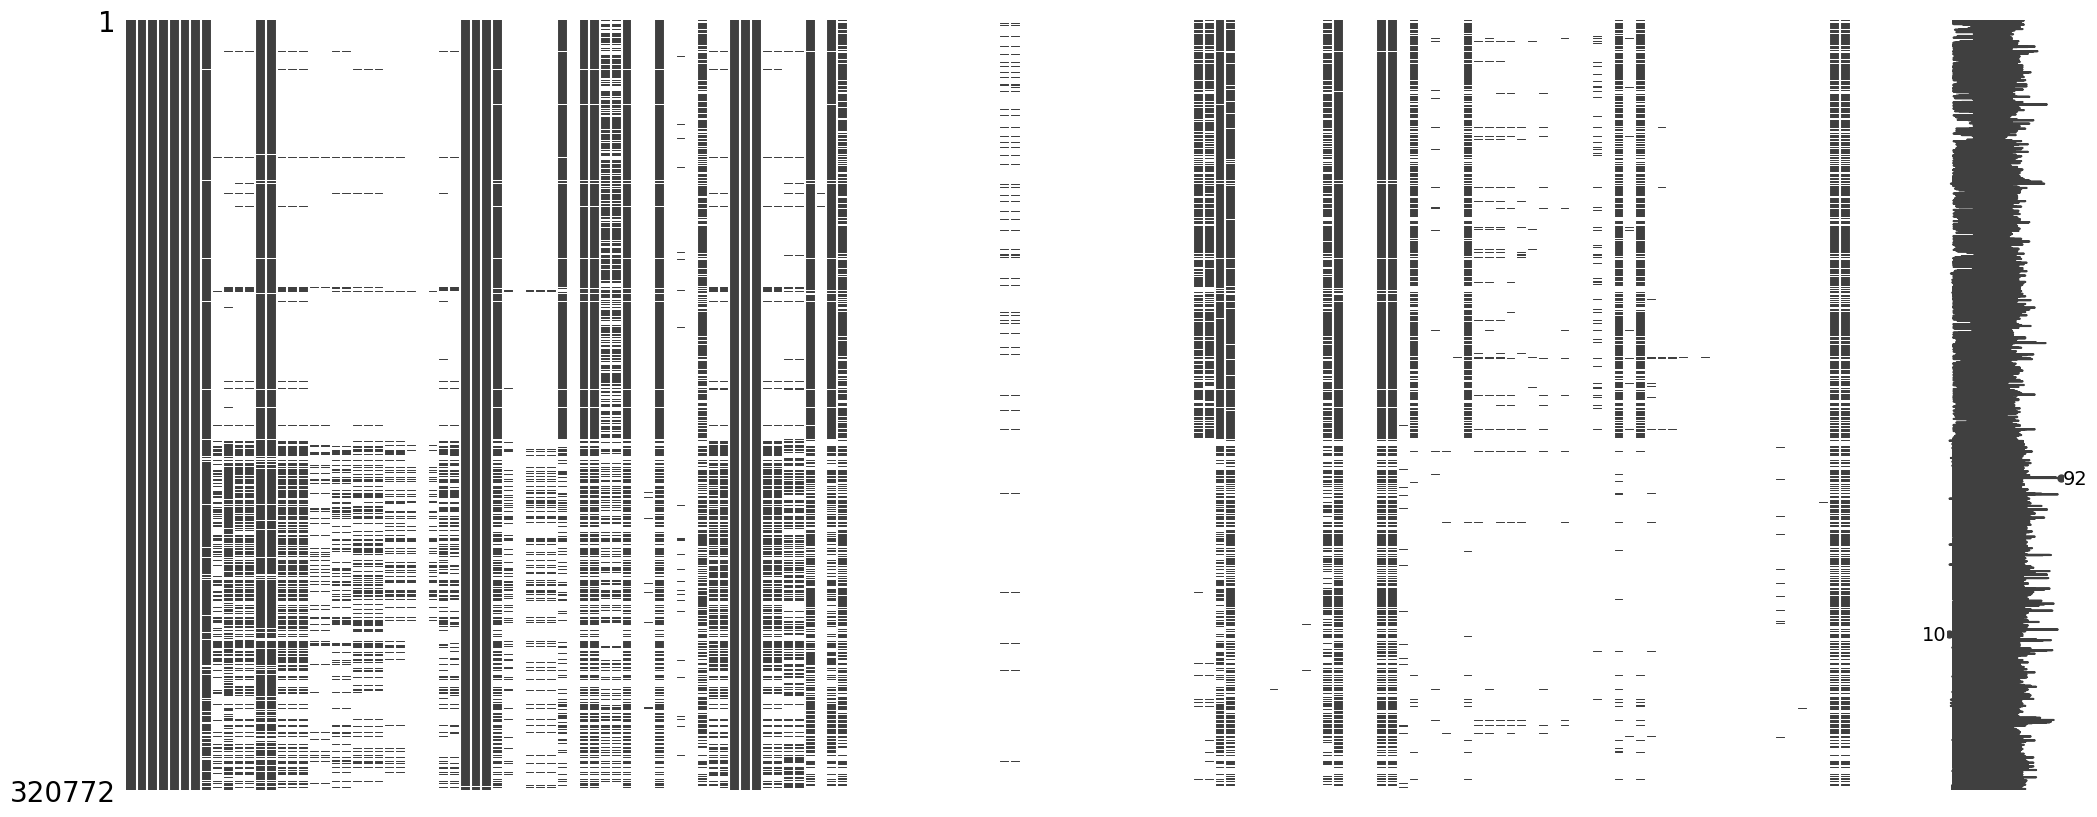

In [153]:
msno.matrix(Food_df)

In [154]:
Food_df.dtypes.value_counts()

float64    106
object      56
Name: count, dtype: int64

- Sépare les features quantitative et qualitative

In [155]:

qualitative_features = Food_df.select_dtypes(exclude=['number']).columns.tolist()

qualitative_features

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url']

- identifier les collonnes qualitatives

In [156]:
quantitative_features = Food_df.select_dtypes(include=['number']).columns.tolist()

quantitative_features

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-aci

- identifier les collonnes quantitative

## 3.2 Analyse des collonnes

In [157]:
missing_values_general=Food_df.isnull().mean().sort_values(ascending=False) * 100
missing_values_general_df = missing_values_general.reset_index()

missing_values_general_df.columns = ['Column', 'Taux de valeurs manquantes (%)']

# Afficher le DataFrame
missing_values_general_df

,Column,Taux de valeurs manquantes (%)
0,ingredients_from_palm_oil,100.000000
1,no_nutriments,100.000000
2,nervonic-acid_100g,100.000000
3,water-hardness_100g,100.000000
4,chlorophyl_100g,100.000000
5,glycemic-index_100g,100.000000
6,melissic-acid_100g,100.000000
7,mead-acid_100g,100.000000
8,elaidic-acid_100g,100.000000
9,erucic-acid_100g,100.000000


- Création d'une variable qui va contenir les valeur manquantes

- Je repère les collone qui possède des valeur nul 

- .sum() --> méthode qui permet de compter le nombre de valeur nul (true = 1)

- .sort_values() --> méthode qui permet de trier les valeurs par ordre croissant

- changement sum en mean --> pour trouver les % de collone vide  


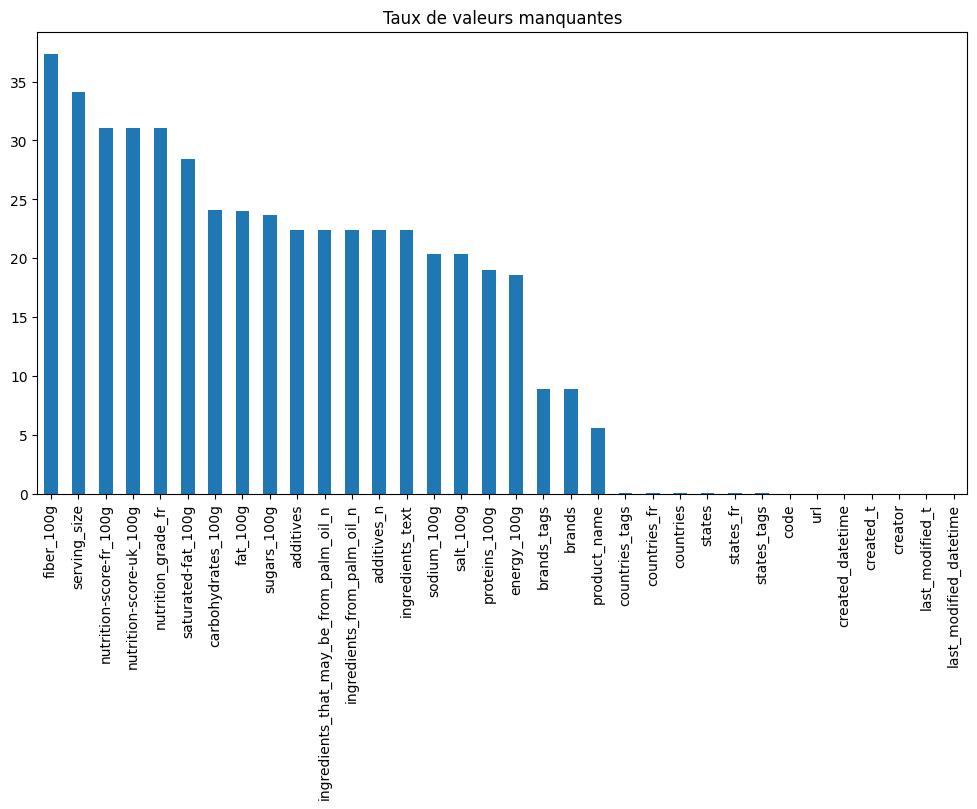

In [158]:
def missing_values(Food_df):
    missing = Food_df.isnull().sum() / len(Food_df) * 100
    missing = missing[missing < 50].sort_values(ascending=False)
    return missing

missing_values(Food_df).plot(kind='bar', figsize=(12,6), title="Taux de valeurs manquantes")
plt.show()

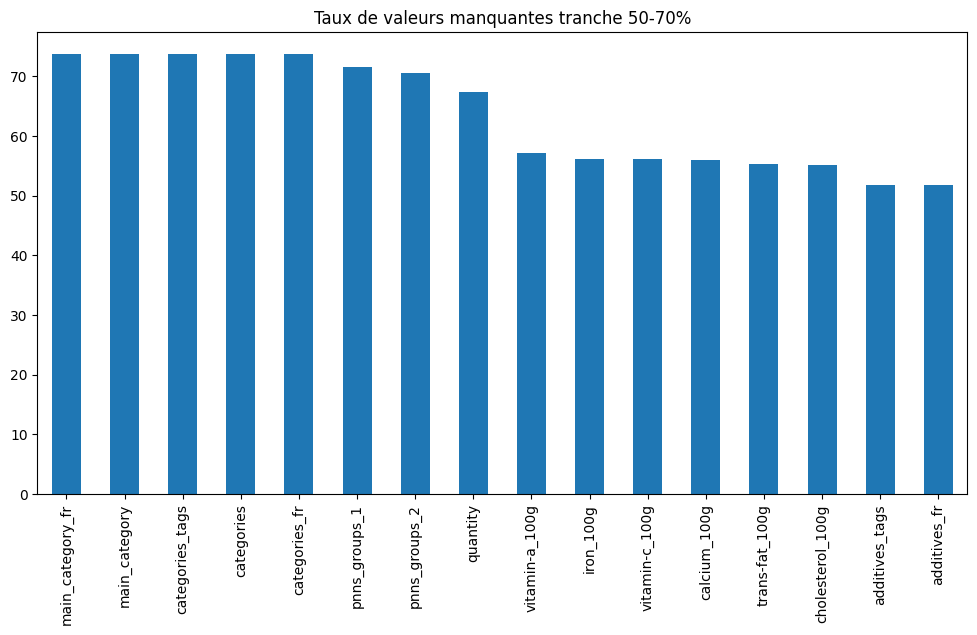

In [159]:
def missing_values(Food_df):
    missing = Food_df.isnull().sum() / len(Food_df) * 100
    missing = missing[(missing >= 50) & (missing <= 75)].sort_values(ascending=False)
    return missing

missing_values(Food_df).plot(kind='bar', figsize=(12,6), title="Taux de valeurs manquantes tranche 50-70%")
plt.show()

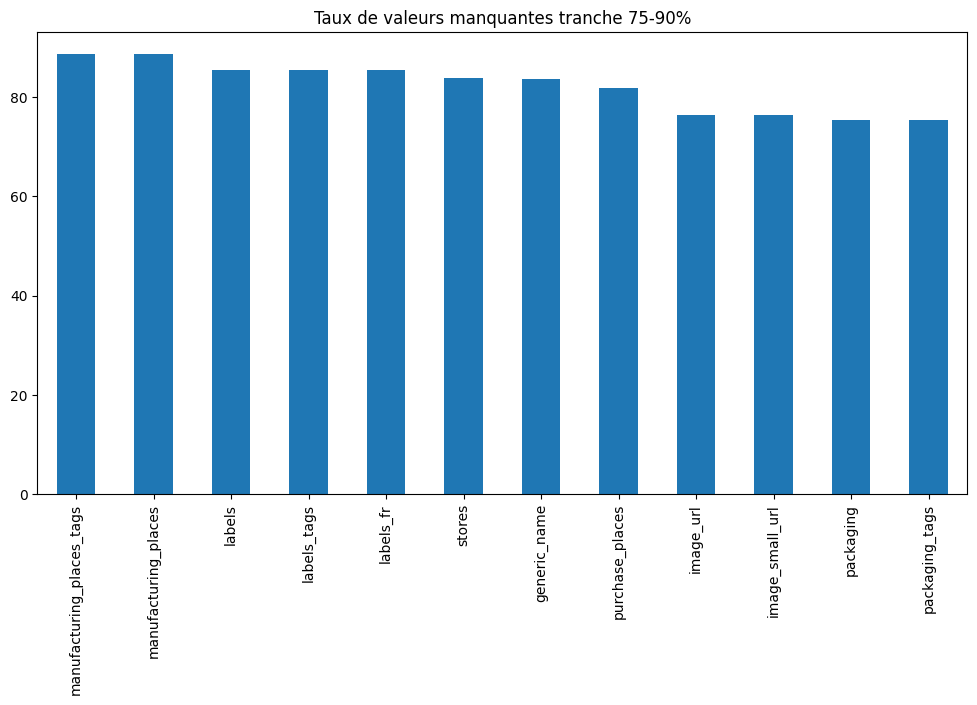

In [160]:
def missing_values(Food_df):
    missing = Food_df.isnull().sum() / len(Food_df) * 100
    missing = missing[(missing >= 75) & (missing <= 90)].sort_values(ascending=False)
    return missing

missing_values(Food_df).plot(kind='bar', figsize=(12,6), title="Taux de valeurs manquantes tranche 75-90%")
plt.show()

## 3.3 Choix des Features

In [161]:
def split_data_by_missing_values(df, selected_columns, threshold=0.5):
    selected_columns = [col for col in selected_columns if col in df.columns]

    complete_data = df[selected_columns].copy()
  
    columns_to_keep = complete_data.columns[complete_data.isnull().mean() < threshold]
    
    filtered_data = complete_data[columns_to_keep].dropna()
    
    return complete_data, filtered_data

- automatisation de la séparation des données en 2 ensemble 
(1: Tout les Features choisis et 2: Toute les Features choisis à loins de 50% de valeurs manquantes)

In [162]:
selected_columns = ['code','product_name','countries','labels', 'labels_fr', 'ingredients_text', 'sugars_100g', 'nutrition_grade_fr',
    'fat_100g', 'saturated-fat_100g', 'salt_100g', 'fiber_100g', 'proteins_100g', 'energy_100g',
    'categories', 'pnns_groups_1', 'pnns_groups_2', 'brands', 'additives_n', 'nutrition-score-fr_100g', 'carbohydrates_100g'
]

complete_data, filtered_data = split_data_by_missing_values(Food_df, selected_columns)


print("Ensemble complet :")
print(complete_data.info())


print("\nEnsemble filtré (moins de 50 % de valeurs manquantes) :")
print(filtered_data.info())


Ensemble complet :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   product_name             303010 non-null  object 
 2   countries                320492 non-null  object 
 3   labels                   46559 non-null   object 
 4   labels_fr                46666 non-null   object 
 5   ingredients_text         248962 non-null  object 
 6   sugars_100g              244971 non-null  float64
 7   nutrition_grade_fr       221210 non-null  object 
 8   fat_100g                 243891 non-null  float64
 9   saturated-fat_100g       229554 non-null  float64
 10  salt_100g                255510 non-null  float64
 11  fiber_100g               200886 non-null  float64
 12  proteins_100g            259922 non-null  float64
 13  energy_100g              261113 non-null

- Selection des colonne manuellement dans selected_colums et appel de la fonction créer split_data_by_missing_values

In [163]:
complete_data.describe()

,sugars_100g,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,additives_n,nutrition-score-fr_100g,carbohydrates_100g
count,244971.000000,243891.000000,229554.000000,255510.000000,200886.000000,259922.000000,2.611130e+05,248939.000000,221210.000000,243588.000000
mean,16.003484,12.730379,5.129932,2.028624,2.862111,7.075940,1.141915e+03,1.936024,9.165535,32.073981
std,22.327284,17.578747,8.014238,128.269454,12.867578,8.409054,6.447154e+03,2.502019,9.055903,29.731719
min,-17.860000,0.000000,0.000000,0.000000,-6.700000,-800.000000,0.000000e+00,0.000000,-15.000000,0.000000
25%,1.300000,0.000000,0.000000,0.063500,0.000000,0.700000,3.770000e+02,0.000000,1.000000,6.000000
50%,5.710000,5.000000,1.790000,0.581660,1.500000,4.760000,1.100000e+03,1.000000,10.000000,20.600000
75%,24.000000,20.000000,7.140000,1.374140,3.600000,10.000000,1.674000e+03,3.000000,16.000000,58.330000
max,3520.000000,714.290000,550.000000,64312.800000,5380.000000,430.000000,3.251373e+06,31.000000,40.000000,2916.670000


In [164]:

missing_values_cd = complete_data.isnull().mean().sort_values(ascending=False) * 100

# Convertir en DataFrame et renommer les colonnes
missing_values_cd = missing_values_cd.reset_index()
missing_values_cd.columns = ['Features', 'Taux de valeurs manquantes (%)']

# Afficher le DataFrame
missing_values_cd


,Features,Taux de valeurs manquantes (%)
0,labels,85.485329
1,labels_fr,85.451972
2,categories,73.685359
3,pnns_groups_1,71.471014
4,pnns_groups_2,70.542628
5,fiber_100g,37.374210
6,nutrition-score-fr_100g,31.038245
7,nutrition_grade_fr,31.038245
8,saturated-fat_100g,28.437021
9,carbohydrates_100g,24.061951


C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\906827932.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taux_remplissage.values, y=taux_remplissage.index, palette='viridis')


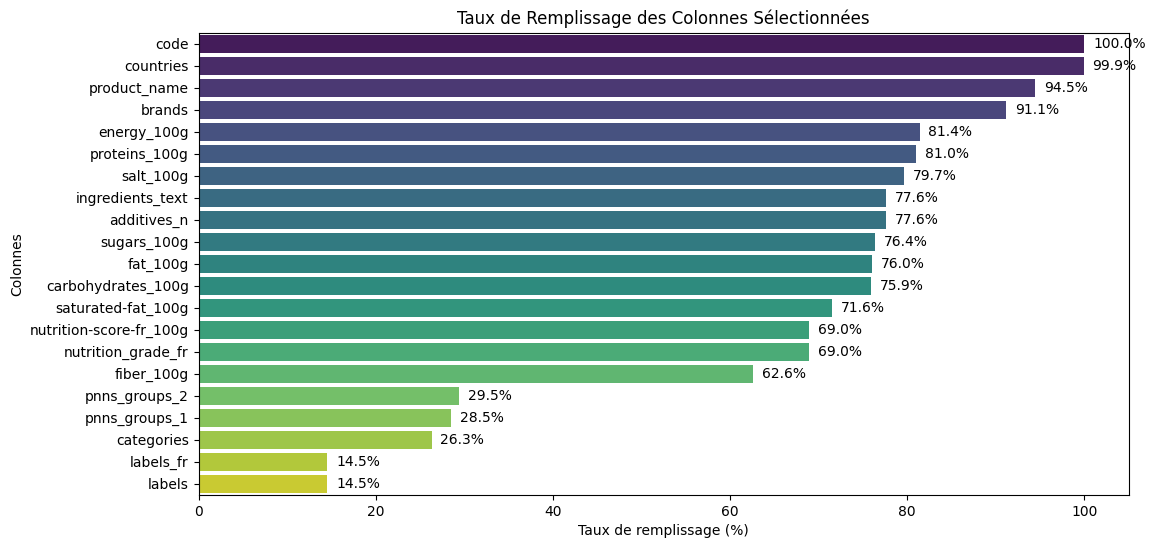

In [165]:

taux_remplissage = complete_data.notnull().mean() * 100  
taux_remplissage = taux_remplissage.sort_values(ascending=False)

# Visualisation du taux de remplissage
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=taux_remplissage.values, y=taux_remplissage.index, palette='viridis')

for i, v in enumerate(taux_remplissage.values):
    plt.text(v + 1, i, f"{v:.1f}%", color='black', va='center')

plt.xlabel("Taux de remplissage (%)")
plt.ylabel("Colonnes")
plt.title("Taux de Remplissage des Colonnes Sélectionnées")
plt.show()

# 4. Nettoyage

## 4.1 Nettoyage des valeurs aberrantes

#### a. Valeur Numérique 

##### a.1 ensemble homogène (Méthode IQR)

In [166]:
categories_pnns_1 = complete_data['pnns_groups_1'].unique()
categories_pnns_2 = complete_data['pnns_groups_2'].unique()

# Convertir les catégories en minuscules pour éviter les problèmes de typographie
complete_data['pnns_groups_1'] = complete_data['pnns_groups_1'].str.lower()
complete_data['pnns_groups_2'] = complete_data['pnns_groups_2'].str.lower()

print("Catégories uniques dans pnns_groups_1 :")
print(categories_pnns_1)

print("\nCatégories uniques dans pnns_groups_2 :")
print(categories_pnns_2)

Catégories uniques dans pnns_groups_1 :
[nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Composite foods' 'Fish Meat Eggs' 'Beverages'
 'Fat and sauces' 'fruits-and-vegetables' 'Milk and dairy products'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']

Catégories uniques dans pnns_groups_2 :
[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Potatoes' 'Dairy desserts' 'Fruit nectars' 'pastries'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


- Je regarde comment est sous divisées via la collone pnns_group_1 et pnns_group_2 (contient les catgéories des produits)

In [167]:
# Normaliser les colonnes pnns_groups_1 et pnns_groups_2
complete_data['pnns_groups_1'] = complete_data['pnns_groups_1'].str.strip().str.lower()
complete_data['pnns_groups_2'] = complete_data['pnns_groups_2'].str.strip().str.lower()

# Remplacer les valeurs manquantes par 'unknown'
complete_data['pnns_groups_1'] = complete_data['pnns_groups_1'].fillna('unknown')
complete_data['pnns_groups_2'] = complete_data['pnns_groups_2'].fillna('unknown')


# Appliquer le dictionnaire de correspondance
category_mapping = {
    # Fruits and vegetables
    'fruits and vegetables': 'Fruits and vegetables',
    'fruits-and-vegetables': 'Fruits and vegetables',
    'vegetables': 'Fruits and vegetables',
    'fruits': 'Fruits and vegetables',
    'dried fruits': 'Fruits and vegetables',
    'legumes': 'Fruits and vegetables',
    
    # Cereals and potatoes
    'cereals and potatoes': 'Cereals and potatoes',
    'cereals-and-potatoes': 'Cereals and potatoes',
    'cereals': 'Cereals and potatoes',
    'potatoes': 'Cereals and potatoes',
    
    # Sugary snacks
    'sugary snacks': 'Sugary snacks',
    'sugary-snacks': 'Sugary snacks',
    'sweets': 'Sugary snacks',
    'chocolate products': 'Sugary snacks',
    'pastries': 'Biscuits and cakes',
    'ice cream': 'Sugary snacks',
    
    # Salty snacks
    'salty snacks': 'Salty snacks',
    'salty-snacks': 'Salty snacks',
    'salty and fatty products': 'Salty snacks',
    
    
    # Milk and dairy products
    'milk and dairy products': 'Milk and dairy products',
    'milk and yogurt': 'Milk and dairy products',
    'cheese': 'Milk and dairy products',
    'dairy desserts': 'Milk and dairy products',
    
    # Fish Meat Eggs
    'fish meat eggs': 'Fish Meat Eggs',
    'meat': 'Fish Meat Eggs',
    'fish and seafood': 'Fish Meat Eggs',
    'eggs': 'Fish Meat Eggs',
    'processed meat': 'Fish Meat Eggs',
    'tripe dishes': 'Fish Meat Eggs',
    
    # Beverages
    'beverages': 'Beverages',
    'non-sugared beverages': 'Beverages',
    'sweetened beverages': 'Beverages',
    'alcoholic beverages': 'Beverages',
    'fruit juices': 'Beverages',
    'fruit nectars': 'Beverages',
    'artificially sweetened beverages': 'Beverages',
    
    # Fat and sauces
    'fat and sauces': 'Fat and sauces',
    'fats': 'Fat and sauces',
    'dressings and sauces': 'Fat and sauces',
    
    # Biscuits and cakes
    'biscuits and cakes': 'Biscuits and cakes',
    'breakfast cereals': 'Biscuits and cakes',
    
    # Composite foods
    'composite foods': 'Composite foods',
    'pizza pies and quiche': 'Composite foods',
    'one-dish meals': 'Composite foods',
    'sandwich': 'Composite foods',
    
    # Nuts
    'nuts': 'Nuts',
    
    # Unknown
    'unknown': 'Unknown'
}

# Appliquer le dictionnaire de correspondance
complete_data['pnns_groups_1'] = complete_data['pnns_groups_1'].replace(category_mapping)
complete_data['pnns_groups_2'] = complete_data['pnns_groups_2'].replace(category_mapping)

# Fusionner pnns_groups_1 et pnns_groups_2 en une seule colonne
complete_data['pnns_groups_combined'] = complete_data['pnns_groups_1'].combine_first(complete_data['pnns_groups_2'])


# Afficher les catégories uniques dans la nouvelle colonne
print("Catégories uniques dans pnns_groups_combined :")
print(complete_data['pnns_groups_combined'].unique())

Catégories uniques dans pnns_groups_combined :
['Unknown' 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish Meat Eggs' 'Beverages' 'Fat and sauces'
 'Milk and dairy products' 'Salty snacks']


- Ici je regroupe les produit du dataset en differente cotégorie pour divisé les donnée par catégorie pour mieux traiter les outliers
- Cela permet aussi de gerer les doublons (colonne en double)

- Attention problème avec la categorie Biscuits and cakes

In [168]:
# Dictionnaire de traduction des catégories en français
translation_mapping = {
    'Fruits and vegetables': 'Fruits et légumes',
    'Cereals and potatoes': 'Céréales et pommes de terre',
    'Sugary snacks': 'Snacks sucrés',
    'Salty snacks': 'Snacks salés',
    'Milk and dairy products': 'Lait et produits laitiers',
    'Fish Meat Eggs': 'Poissons viandes et œufs',
    'Beverages': 'Boissons',
    'Fat and sauces': 'Graisses et sauces',
    'Biscuits and cakes': 'Biscuits et gâteaux',
    'Composite foods': 'Plats composés',
    'Nuts': 'Noix',
    'Unknown': 'Unknow'
}

# Appliquer la traduction à la colonne pnns_groups_combined
complete_data['pnns_groups_combined'] = complete_data['pnns_groups_combined'].replace(translation_mapping)

# Afficher les catégories uniques traduites
print("Catégories uniques dans pnns_groups_combined (traduites) :")
print(complete_data['pnns_groups_combined'].unique())

Catégories uniques dans pnns_groups_combined (traduites) :
['Unknow' 'Fruits et légumes' 'Snacks sucrés'
 'Céréales et pommes de terre' 'Plats composés' 'Poissons viandes et œufs'
 'Boissons' 'Graisses et sauces' 'Lait et produits laitiers'
 'Snacks salés']


- je remplace pnns_groups_1 et pnns_groups_2 par la nouvelle colonne pnns_groups_combined

In [169]:
category_counts = complete_data['pnns_groups_combined'].value_counts()
print("Nombre de produits par catégorie dans pnns_groups_1 :")
print(category_counts)

Nombre de produits par catégorie dans pnns_groups_1 :
pnns_groups_combined
Unknow                         251883
Snacks sucrés                   12864
Boissons                         9033
Lait et produits laitiers        8825
Céréales et pommes de terre      8458
Poissons viandes et œufs         8041
Fruits et légumes                6895
Plats composés                   6747
Graisses et sauces               5216
Snacks salés                     2810
Name: count, dtype: int64


In [170]:
# Calculer l'écart-type pour toutes les colonnes numériques par catégorie
numeric_columns = complete_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
group_variability = complete_data.groupby('pnns_groups_combined')[numeric_columns].std()

# Afficher la variabilité par catégorie
print("Variabilité (écart-type) pour chaque catégorie :")
print(group_variability)

Variabilité (écart-type) pour chaque catégorie :
                             sugars_100g   fat_100g  saturated-fat_100g  \
pnns_groups_combined                                                      
Boissons                       16.603847   2.993137            2.653859   
Céréales et pommes de terre     9.253175   8.762195            2.747823   
Fruits et légumes              16.224111   7.889069            4.390494   
Graisses et sauces              9.399536  37.014949           18.575878   
Lait et produits laitiers       7.998825  11.835736            8.066536   
Plats composés                  2.189996   5.339946            2.559392   
Poissons viandes et œufs        1.139254  11.680865            4.504036   
Snacks salés                    6.619512  16.220221            7.130482   
Snacks sucrés                  19.765195  13.842831            8.288158   
Unknow                         23.146106  17.525255            7.858190   

                              salt_100g  fiber_100

In [171]:
# Calculer la moyenne de l'écart-type pour chaque groupe
group_variability['mean_std'] = group_variability.mean(axis=1)

# Définir un seuil pour l'homogénéité
threshold = 5  # Vous pouvez ajuster ce seuil en fonction de vos données
group_variability['classification'] = group_variability['mean_std'].apply(
    lambda x: 'homogeneous' if x < threshold else 'heterogeneous'
)

# Afficher la classification des groupes
print("Classification des groupes (homogène ou hétérogène) :")
print(group_variability[['mean_std', 'classification']])

Classification des groupes (homogène ou hétérogène) :
                               mean_std classification
pnns_groups_combined                                  
Boissons                      43.255064  heterogeneous
Céréales et pommes de terre   55.377160  heterogeneous
Fruits et légumes             56.496533  heterogeneous
Graisses et sauces           136.643597  heterogeneous
Lait et produits laitiers     56.598106  heterogeneous
Plats composés                38.869245  heterogeneous
Poissons viandes et œufs      48.586032  heterogeneous
Snacks salés                  62.344193  heterogeneous
Snacks sucrés                 63.033481  heterogeneous
Unknow                       750.139899  heterogeneous


In [172]:
# Calculer les statistiques descriptives pour sugars_100g par catégorie regroupée
group_stats = complete_data.groupby('pnns_groups_combined')['sugars_100g'].describe()

# Afficher les statistiques descriptives
print("Statistiques descriptives pour sugars_100g par catégorie regroupée :")
print(group_stats)

Statistiques descriptives pour sugars_100g par catégorie regroupée :
                                count       mean        std    min     25%  \
pnns_groups_combined                                                         
Boissons                       6023.0  11.745616  16.603847   0.00   4.700   
Céréales et pommes de terre    6914.0   6.807778   9.253175   0.00   1.355   
Fruits et légumes              4379.0  10.654145  16.224111   0.00   1.300   
Graisses et sauces             3805.0   5.818014   9.399536   0.00   0.500   
Lait et produits laitiers      6936.0   7.580187   7.998825  -0.10   0.800   
Plats composés                 5780.0   2.425853   2.189996   0.00   1.000   
Poissons viandes et œufs       5410.0   0.878638   1.139254   0.00   0.200   
Snacks salés                   2381.0   4.750546   6.619512   0.00   1.400   
Snacks sucrés                 10224.0  40.050348  19.765195   0.00  27.100   
Unknow                       193119.0  16.785752  23.146106 -17.86   1.50

- Les moyennes de sugars_100g varient fortement entre les catégories, indiquant une hétérogénéité des produits (par exemple, les catégories sucrées comme "Snacks sucrés" auront des valeurs élevées).
- Certaines catégories ont un écart-type élevé, ce qui montre une grande variabilité interne des produits dans ces groupes.
- Les catégories avec peu de produits (faible count) peuvent être moins représentatives et nécessitent une analyse plus prudente.

1. Beverages : Moyenne élevée (11.75 g/100g) et forte variabilité (écart-type 16.60), les boissons sont très hétérogènes.
2. Cereals and potatoes : Moyenne modérée (6.81 g/100g) avec une variabilité notable (écart-type 9.26), catégorie hétérogène.
3. Composite foods : Moyenne faible (2.42 g/100g) et faible variabilité (écart-type 2.18), catégorie homogène.
4. Fat and sauces : Moyenne faible (5.81 g/100g) mais variabilité modérée (écart-type 9.39), catégorie hétérogène.
5. Fish Meat Eggs : Moyenne très faible (0.87 g/100g) et faible variabilité (écart-type 1.13), catégorie homogène.
6. Fruits and vegetables : Moyenne modérée (12.23 g/100g) mais forte variabilité (écart-type 17.21), catégorie hétérogène.
7. Milk and dairy products : Moyenne modérée (7.58 g/100g) avec une variabilité modérée (écart-type 7.99), catégorie hétérogène.
8. Salty snacks : Moyenne faible (4.75 g/100g) et variabilité modérée (écart-type 6.62), catégorie hétérogène.
9. Sugary snacks : Moyenne très élevée (41.07 g/100g) et forte variabilité (écart-type 19.45), catégorie hétérogène.
10. cereals-and-potatoes : Moyenne faible (2.70 g/100g) et faible variabilité (écart-type 3.23), catégorie homogène.
11. fruits-and-vegetables : Moyenne faible (2.32 g/100g) et faible variabilité (écart-type 2.70), catégorie homogène.
12. salty-snacks : Moyenne faible (5.30 g/100g) avec peu de données (NaN pour l'écart-type), catégorie homogène.
13. sugary-snacks : Moyenne modérée (14.83 g/100g) et faible variabilité (écart-type 5.96), catégorie homogène.
14. unknown : Moyenne modérée (13.92 g/100g) mais forte variabilité (écart-type 19.65), catégorie hétérogène.

###### clean outliers

In [173]:
def plot_boxplots(df, numeric_columns, x_label="Valeurs", y_label="Colonnes", title_prefix="Boxplot pour"):
    for column in numeric_columns:
        if column in df.columns:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[column], color='red')
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.title(f"{title_prefix} {column}")
            plt.show()

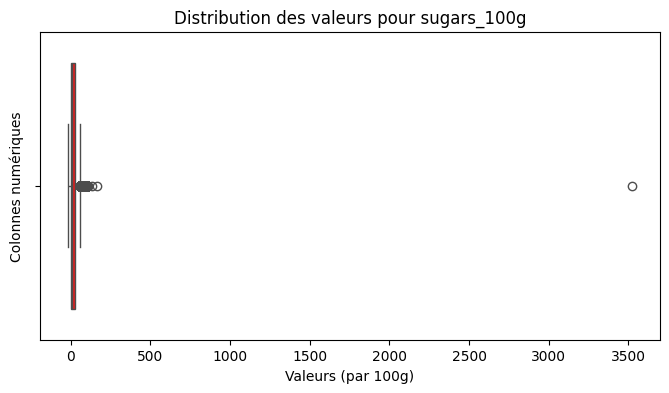

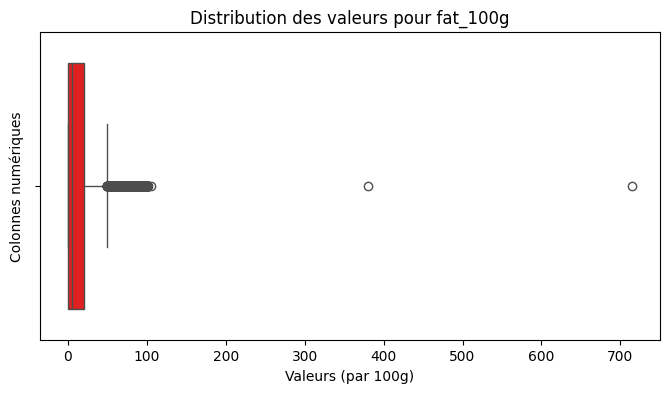

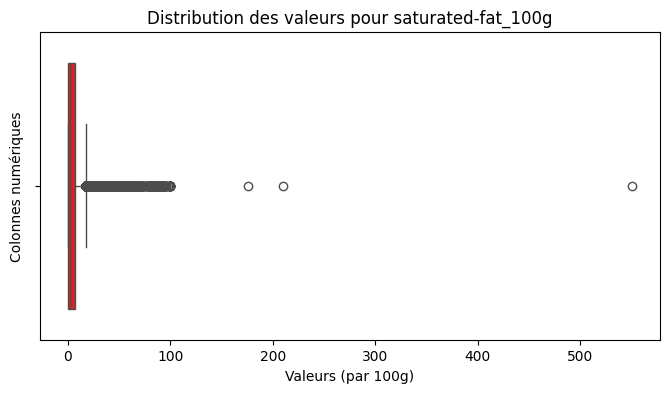

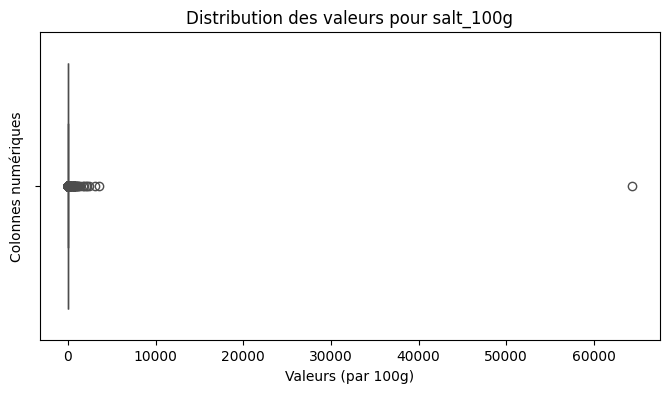

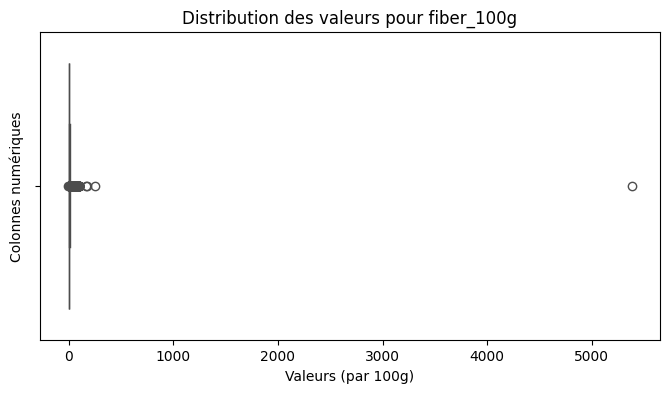

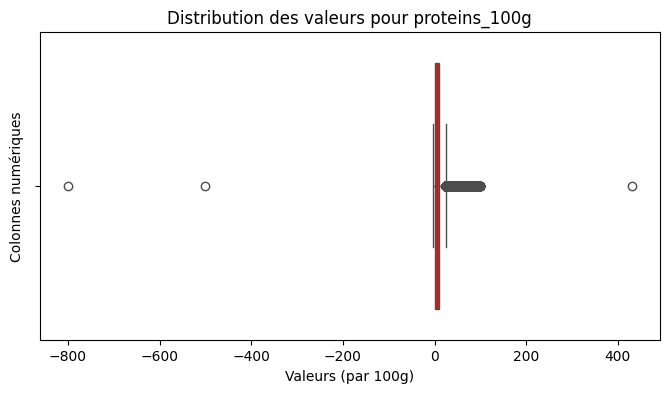

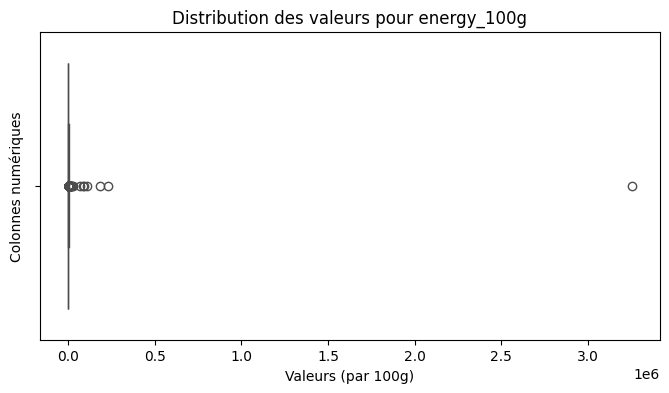

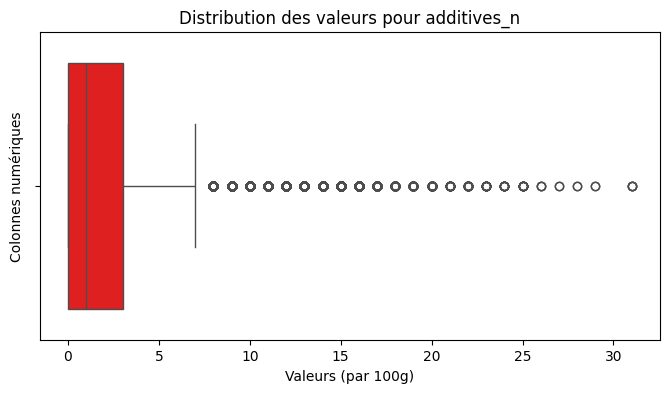

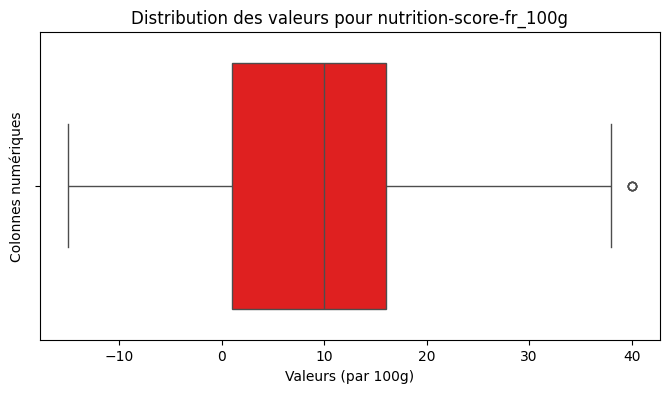

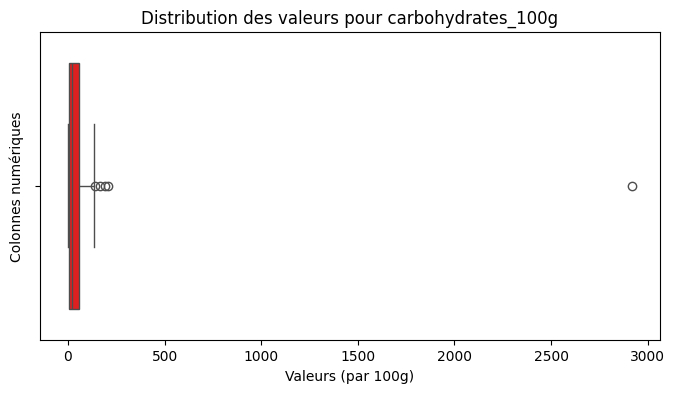

In [174]:
# Liste des colonnes numériques
numeric_columns = complete_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

plot_boxplots(
    complete_data,
    numeric_columns,
    x_label="Valeurs (par 100g)",
    y_label="Colonnes numériques",
    title_prefix="Distribution des valeurs pour"
)

In [175]:
# Définir les catégories homogènes et hétérogènes
homogeneous_categories = [
    'plats préparé', 'poissons viandes et oeufs', 'cereals et pommes de terre',
    
]

heterogeneous_categories = [
    'boissons', 'céréales et pommes de terre', 'gras et sauce', 
    'fruits et légumes', 'lait et produits laitiers', 
    'snacks salé', 'snacks sucré', 'unknown'
]

In [176]:
def clean_outliers_by_group(df, numeric_columns, group_columns):
    df_cleaned = df.copy()
    
    for group_column in group_columns:
        for column in numeric_columns:
            if column in df_cleaned.columns:
                # Remplacer les valeurs négatives par la médiane des valeurs positives dans le groupe
                df_cleaned[column] = df_cleaned.groupby(group_column)[column].transform(
                    lambda x: x.where(x >= 0, x[x >= 0].median())
                )
                
                # Appliquer la méthode IQR pour détecter et corriger les valeurs aberrantes
                df_cleaned[column] = df_cleaned.groupby(group_column)[column].transform(
                    lambda x: x.clip(lower=x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)),
                                     upper=x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
                )
                
                # Conserver les NaN
                df_cleaned[column] = df_cleaned[column].where(~df[column].isna(), np.nan)
    
    return df_cleaned

# Liste des colonnes numériques
numeric_columns = complete_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Nettoyer les valeurs aberrantes par sous-division (pnns_groups_combined)
complete_data_cleaned = clean_outliers_by_group(complete_data, numeric_columns, ['pnns_groups_combined'])

In [177]:
complete_data_cleaned.isna().sum()

code                           23
product_name                17762
countries                     280
labels                     274213
labels_fr                  274106
ingredients_text            71810
sugars_100g                 75801
nutrition_grade_fr          99562
fat_100g                    76881
saturated-fat_100g          91218
salt_100g                   65262
fiber_100g                 119886
proteins_100g               60850
energy_100g                 59659
categories                 236362
pnns_groups_1                   0
pnns_groups_2                   0
brands                      28412
additives_n                 71833
nutrition-score-fr_100g     99562
carbohydrates_100g          77184
pnns_groups_combined            0
dtype: int64

In [178]:
complete_data_cleaned.count()

code                       320749
product_name               303010
countries                  320492
labels                      46559
labels_fr                   46666
ingredients_text           248962
sugars_100g                244971
nutrition_grade_fr         221210
fat_100g                   243891
saturated-fat_100g         229554
salt_100g                  255510
fiber_100g                 200886
proteins_100g              259922
energy_100g                261113
categories                  84410
pnns_groups_1              320772
pnns_groups_2              320772
brands                     292360
additives_n                248939
nutrition-score-fr_100g    221210
carbohydrates_100g         243588
pnns_groups_combined       320772
dtype: int64

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


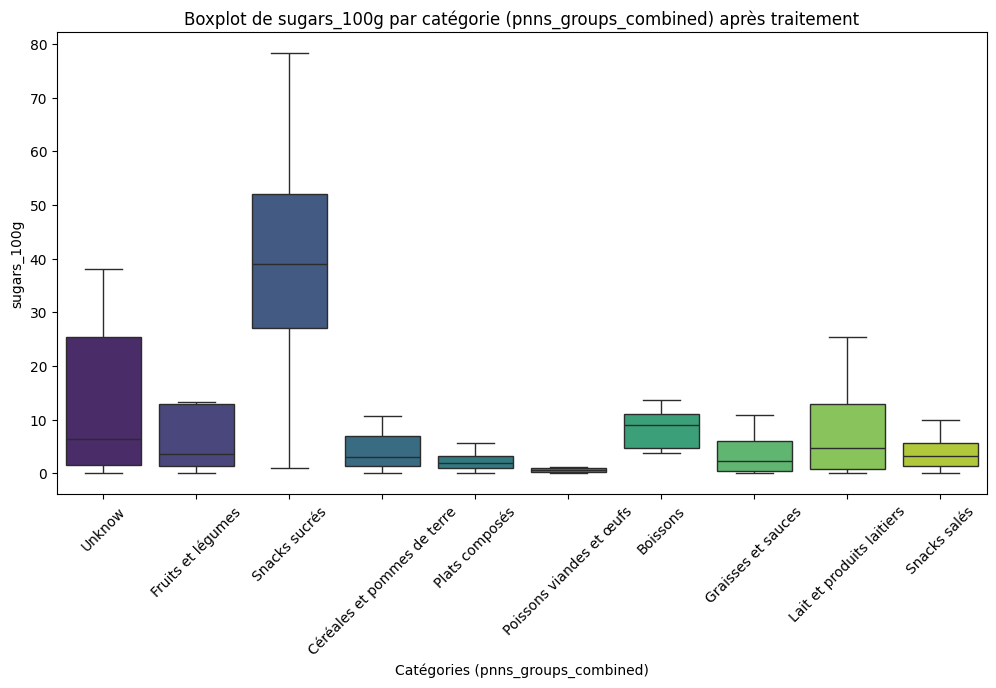

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


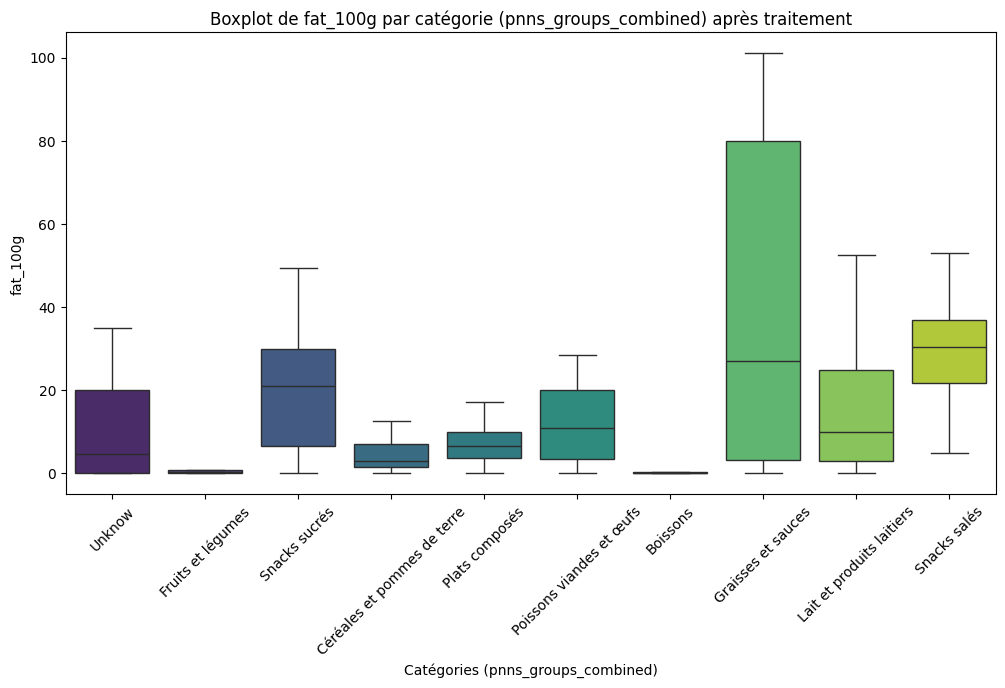

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


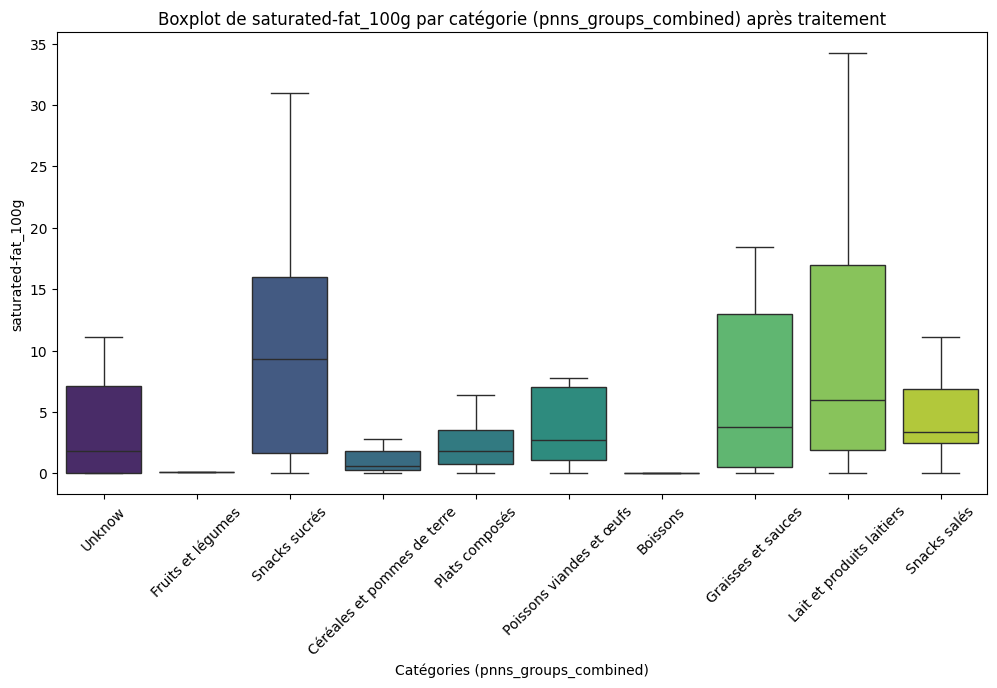

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


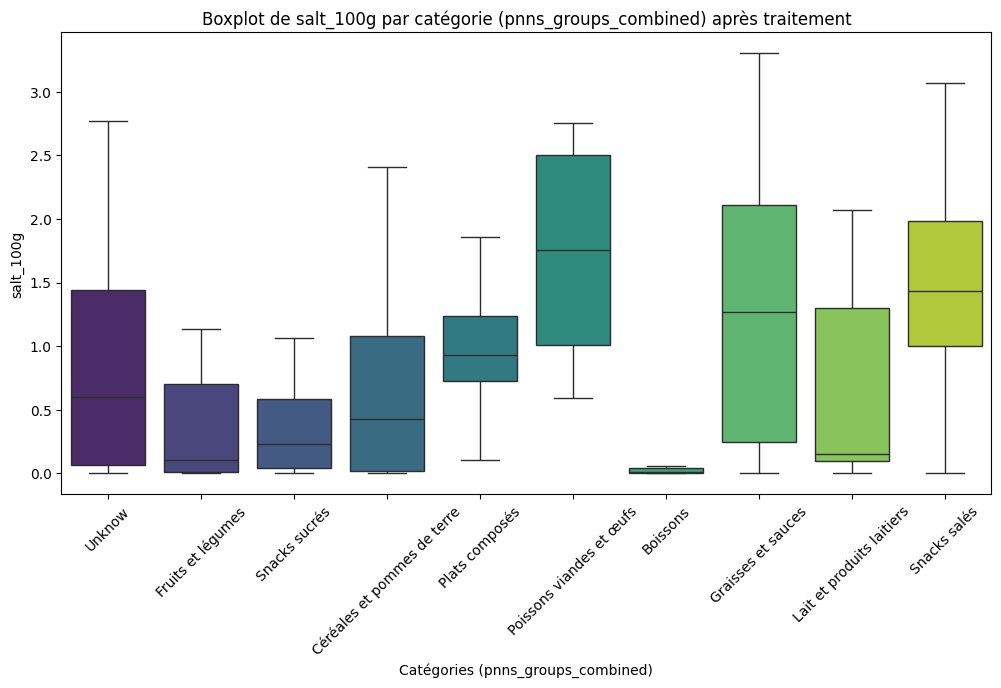

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


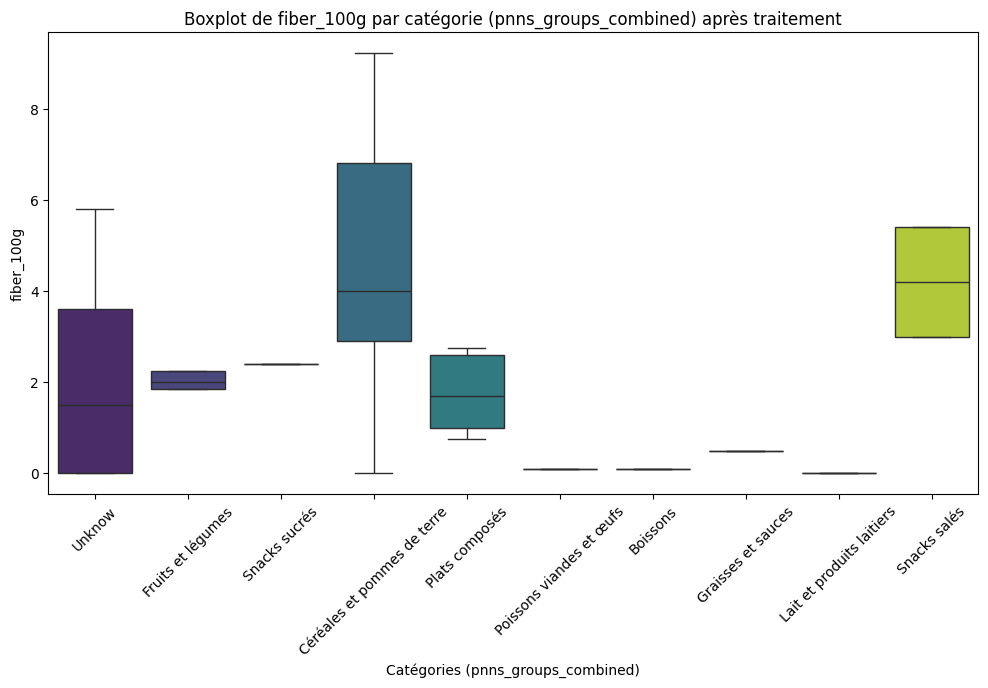

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


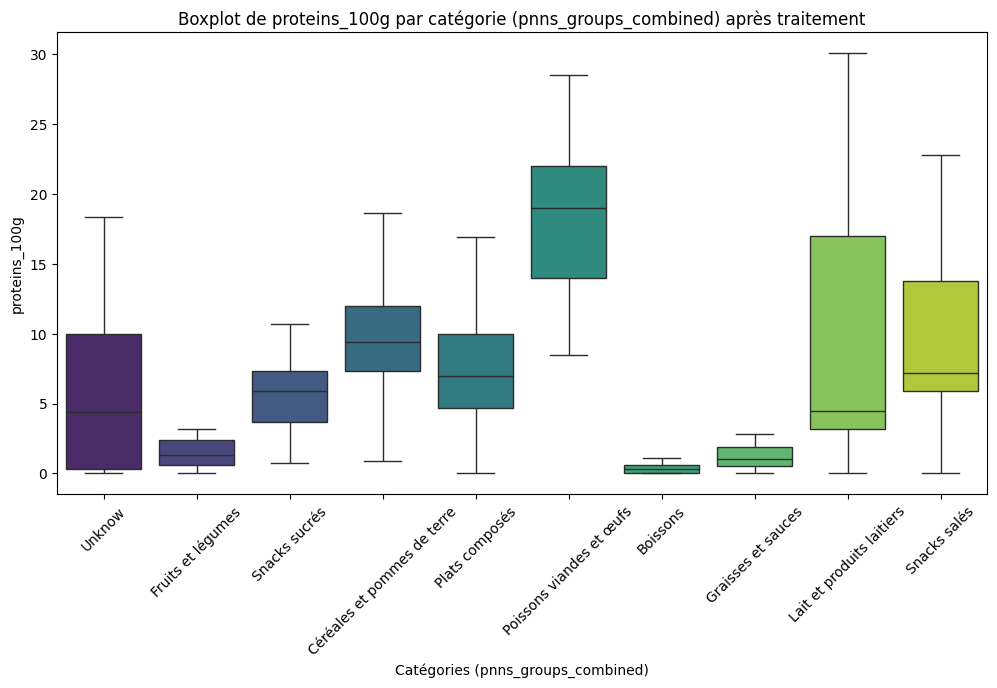

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


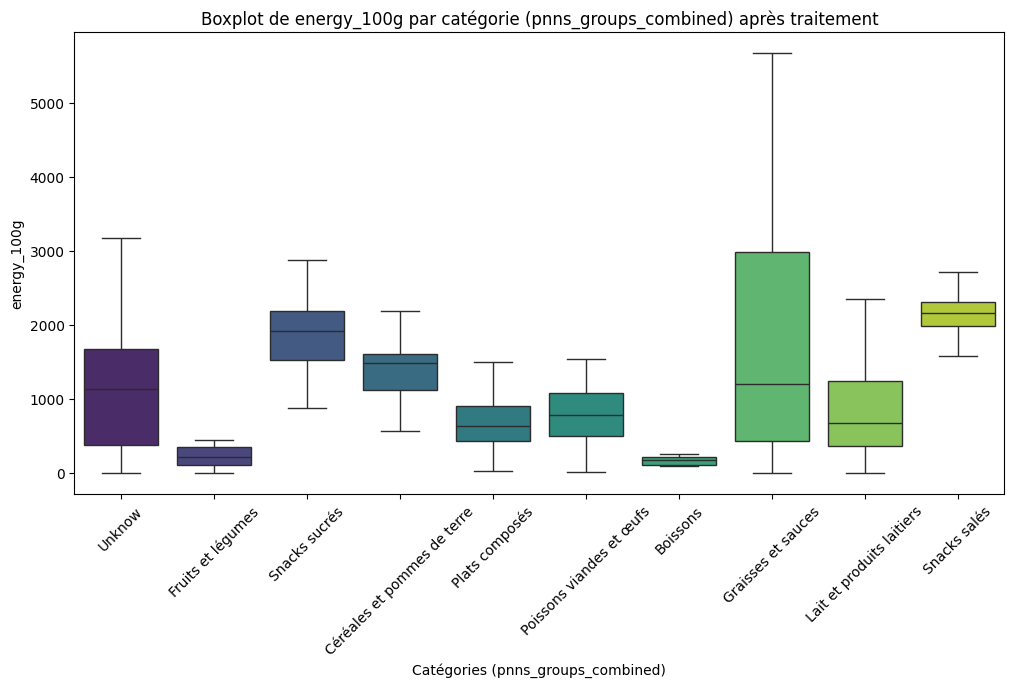

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


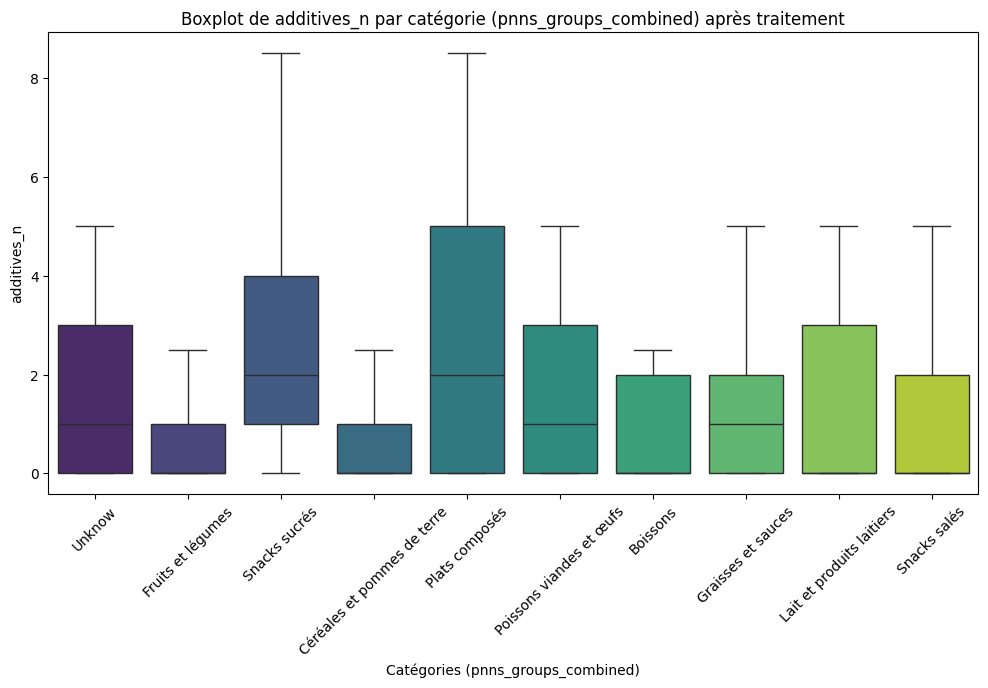

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


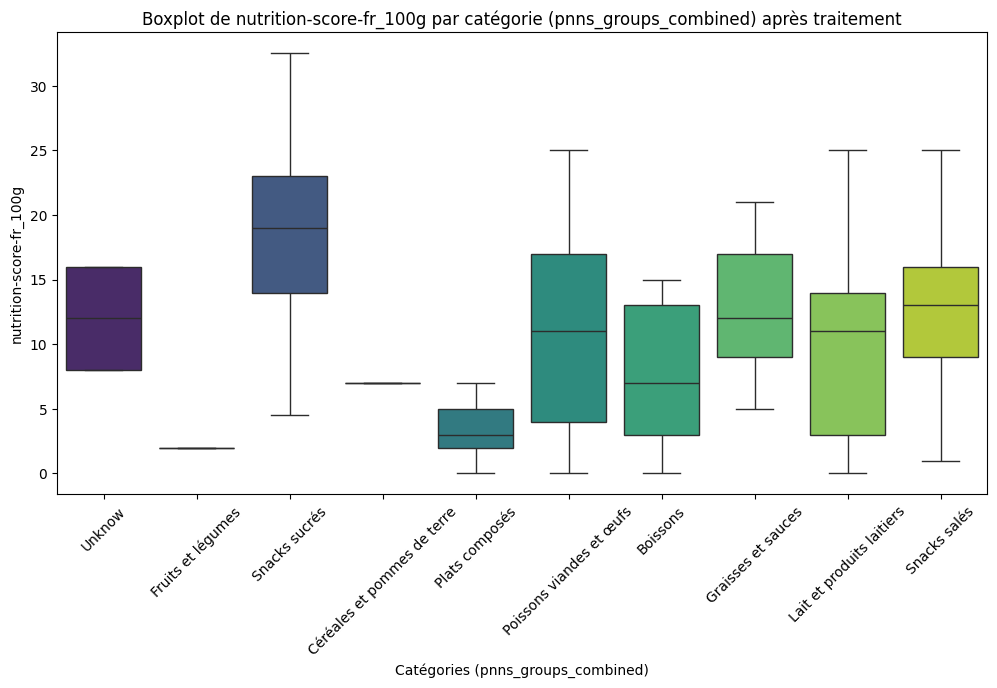

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1365348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')


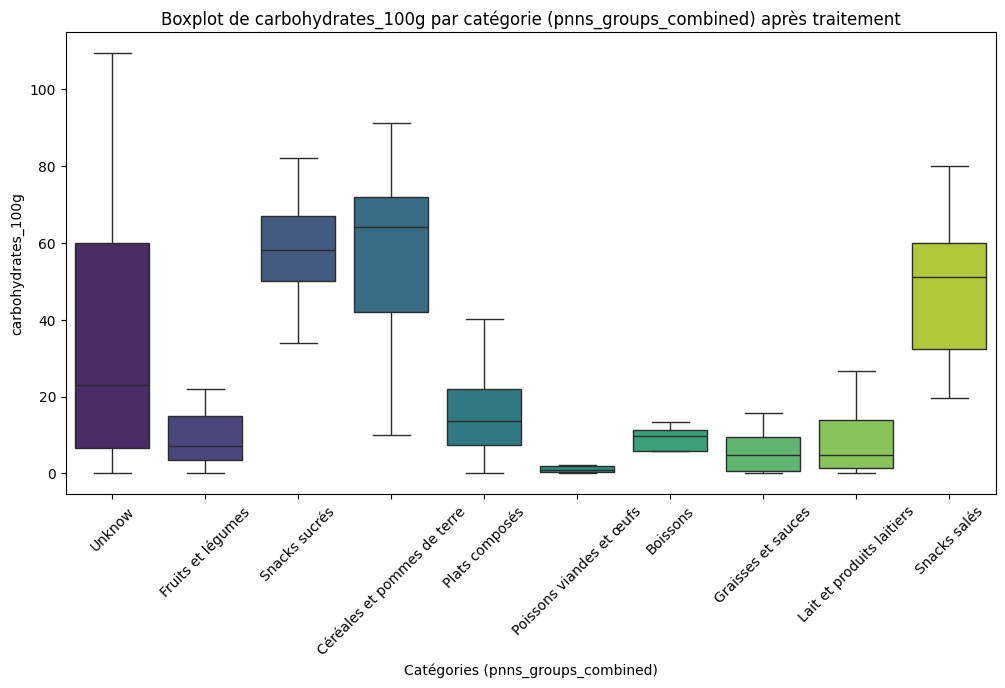

In [179]:
# Visualiser les boxplots pour toutes les colonnes numériques par pnns_groups_1
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='pnns_groups_combined', y=column, data=complete_data_cleaned, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Boxplot de {column} par catégorie (pnns_groups_combined) après traitement")
    plt.xlabel("Catégories (pnns_groups_combined)")
    plt.ylabel(column)
    plt.show()

In [180]:
# Comparer les valeurs avant et après nettoyage
print("Valeurs avant nettoyage :")
print(complete_data['sugars_100g'].describe())

print("\nValeurs après nettoyage :")
print(complete_data_cleaned['sugars_100g'].describe())

Valeurs avant nettoyage :
count    244971.000000
mean         16.003484
std          22.327284
min         -17.860000
25%           1.300000
50%           5.710000
75%          24.000000
max        3520.000000
Name: sugars_100g, dtype: float64

Valeurs après nettoyage :
count    244971.000000
mean         13.019990
std          14.885216
min           0.000000
25%           1.300000
50%           5.700000
75%          23.180000
max          78.250000
Name: sugars_100g, dtype: float64


In [181]:
group_stats_cleaned = complete_data_cleaned.groupby('pnns_groups_combined')[numeric_columns].describe()

# Afficher les statistiques descriptives après nettoyage
print("Statistiques descriptives après nettoyage pour toutes les colonnes numériques :")
print(group_stats_cleaned)

Statistiques descriptives après nettoyage pour toutes les colonnes numériques :
                            sugars_100g                                      \
                                  count       mean        std   min     25%   
pnns_groups_combined                                                          
Boissons                         6023.0   8.436123   3.365925  3.75   4.700   
Céréales et pommes de terre      6914.0   4.340686   3.649594  0.00   1.355   
Fruits et légumes                4379.0   6.060825   5.237418  0.00   1.300   
Graisses et sauces               3805.0   3.777496   3.847329  0.00   0.500   
Lait et produits laitiers        6936.0   7.424396   7.474558  0.00   0.800   
Plats composés                   5780.0   2.272825   1.532265  0.00   1.000   
Poissons viandes et œufs         5410.0   0.643835   0.437309  0.05   0.200   
Snacks salés                     2381.0   3.798623   2.893818  0.00   1.400   
Snacks sucrés                   10224.0  39.535708 

In [182]:
# Supprimer les colonnes pnns_groups_1 et pnns_groups_2
complete_data_cleaned = complete_data_cleaned.drop(columns=['pnns_groups_1', 'pnns_groups_2'], errors='ignore')

# Vérifier que pnns_groups_combined est bien présent
if 'pnns_groups_combined' not in complete_data_cleaned.columns:
    raise ValueError("La colonne 'pnns_groups_combined' n'existe pas dans le DataFrame.")

- remplacement de pnns_groups_1 et pnns_groups_2 par pnns_groups_combined

##### a.2 Ensemble Hétérogène

In [183]:
complete_data_cleaned['energy_100g'].describe()

count    261113.000000
mean       1117.406029
std         786.516687
min           0.000000
25%         373.000000
50%        1088.000000
75%        1674.000000
max        5667.125000
Name: energy_100g, dtype: float64

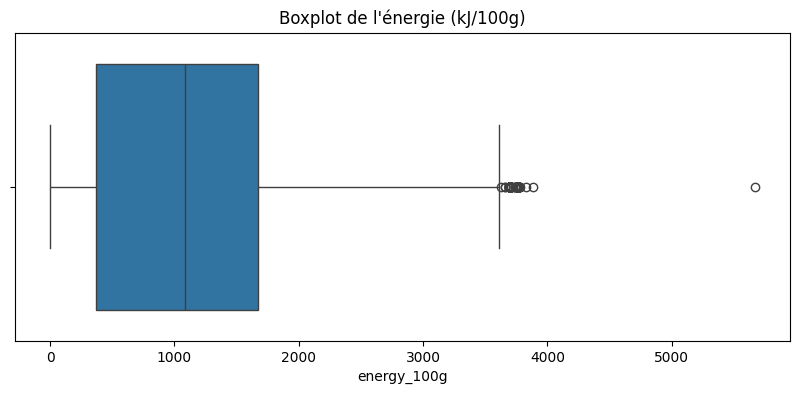

In [184]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=complete_data_cleaned['energy_100g'])
plt.title("Boxplot de l'énergie (kJ/100g)")
plt.show()

In [185]:
complete_data_cleaned.head()

,code,product_name,countries,labels,labels_fr,ingredients_text,sugars_100g,nutrition_grade_fr,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,categories,brands,additives_n,nutrition-score-fr_100g,carbohydrates_100g,pnns_groups_combined
0,0000000003087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,Unknow
1,0000000004530,Banana Chips Sweetened (Whole),US,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",14.29,d,28.570,11.10,0.00000,3.6,3.57,2243.0,NaN,NaN,0.0,14.0,64.29,Unknow
2,0000000004559,Peanuts,US,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,b,17.860,0.00,0.63500,5.8,17.86,1941.0,NaN,Torn & Glasser,0.0,8.0,60.71,Unknow
3,0000000016087,Organic Salted Nut Mix,US,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",3.57,d,34.975,5.36,1.22428,5.8,17.86,2540.0,NaN,Grizzlies,0.0,12.0,17.86,Unknow
4,0000000016094,Organic Polenta,US,NaN,NaN,Organic polenta,NaN,NaN,1.430,NaN,NaN,5.7,8.57,1552.0,NaN,Bob's Red Mill,0.0,NaN,77.14,Unknow


In [186]:
def clean_isolation_forest(df, group_column, target_column, contamination=0.01):
    df_cleaned = pd.DataFrame()
    for group in df[group_column].dropna().unique():
        group_data = df[df[group_column] == group]
        
        # Filtrer les valeurs non nulles et numériques
        group_data_numeric = group_data[[target_column]].dropna()
        group_data_numeric = group_data_numeric[group_data_numeric[target_column] >= 0]

        print(f"Traitement du groupe: {group}")
        print(f"Nombre de lignes avant filtrage : {len(group_data_numeric)}")

        if len(group_data_numeric) < 10:
            # Si le groupe a moins de 10 valeurs valides, on le conserve tel quel
            df_cleaned = pd.concat([df_cleaned, group_data])
            print(f"Moins de 10 lignes, groupe conservé tel quel.")
            continue

        # Appliquer Isolation Forest
        iso = IsolationForest(contamination=contamination, random_state=42)
        group_data_numeric['outlier'] = iso.fit_predict(group_data_numeric[[target_column]])

        # Garder uniquement les points normaux (outlier = 1)
        cleaned_group = group_data_numeric[group_data_numeric['outlier'] == 1].drop(columns='outlier')

        print(f"Nombre de lignes après filtrage : {len(cleaned_group)}")

        # Réintégrer les colonnes non utilisées dans le nettoyage
        if not cleaned_group.empty:
            cleaned_group = group_data.loc[cleaned_group.index]
        else:
            print(f"Toutes les lignes du groupe {group} ont été supprimées. Conserver les données d'origine.")
            cleaned_group = group_data

        # Ajouter au DataFrame nettoyé
        df_cleaned = pd.concat([df_cleaned, cleaned_group])

    print(f"Nombre total de lignes après nettoyage : {len(df_cleaned)}")
    return df_cleaned.reset_index(drop=True)

Traitement du groupe: Unknow
Nombre de lignes avant filtrage : 206083
Nombre de lignes après filtrage : 205119
Traitement du groupe: Fruits et légumes
Nombre de lignes avant filtrage : 4726
Nombre de lignes après filtrage : 4679
Traitement du groupe: Snacks sucrés
Nombre de lignes avant filtrage : 10575
Nombre de lignes après filtrage : 10469
Traitement du groupe: Céréales et pommes de terre
Nombre de lignes avant filtrage : 7451
Nombre de lignes après filtrage : 7376
Traitement du groupe: Plats composés
Nombre de lignes avant filtrage : 6019
Nombre de lignes après filtrage : 5958
Traitement du groupe: Poissons viandes et œufs
Nombre de lignes avant filtrage : 5868
Nombre de lignes après filtrage : 5819
Traitement du groupe: Boissons
Nombre de lignes avant filtrage : 6336
Nombre de lignes après filtrage : 6275
Traitement du groupe: Graisses et sauces
Nombre de lignes avant filtrage : 4109
Nombre de lignes après filtrage : 4067
Traitement du groupe: Lait et produits laitiers
Nombre de l

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\1777652709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pnns_groups_combined', y='energy_100g', data=complete_data_cleaned, palette='viridis')


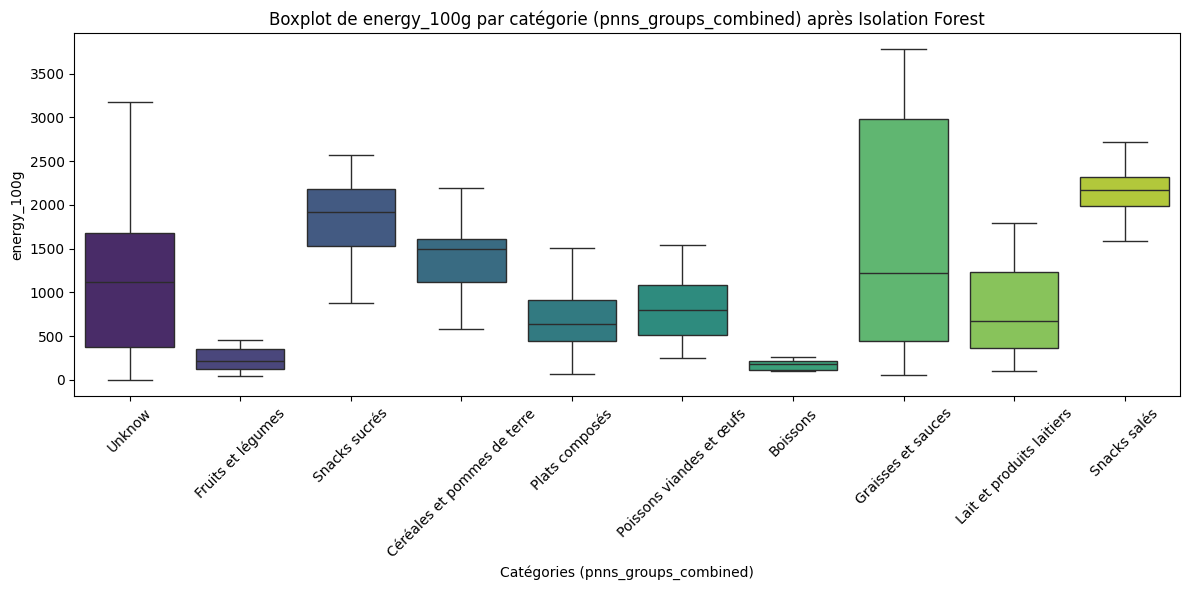

In [187]:
complete_data_cleaned = clean_isolation_forest(complete_data_cleaned, 'pnns_groups_combined', 'energy_100g', contamination=0.01)

# Visualisation des boxplots après nettoyage
plt.figure(figsize=(12, 6))
sns.boxplot(x='pnns_groups_combined', y='energy_100g', data=complete_data_cleaned, palette='viridis')
plt.xticks(rotation=45)
plt.title("Boxplot de energy_100g par catégorie (pnns_groups_combined) après Isolation Forest")
plt.xlabel("Catégories (pnns_groups_combined)")
plt.ylabel("energy_100g")
plt.tight_layout()
plt.show()

###### catégorie unknown

In [188]:
print(complete_data_cleaned['pnns_groups_combined'].value_counts(dropna=False))

pnns_groups_combined
Unknow                         205119
Snacks sucrés                   10469
Lait et produits laitiers        7404
Céréales et pommes de terre      7376
Boissons                         6275
Plats composés                   5958
Poissons viandes et œufs         5819
Fruits et légumes                4679
Graisses et sauces               4067
Snacks salés                     2445
Name: count, dtype: int64


In [189]:
complete_data_cleaned['pnns_groups_combined'] = complete_data_cleaned['pnns_groups_combined'].replace('Unknow', 'autres')
print(complete_data_cleaned['pnns_groups_combined'].unique())

['autres' 'Fruits et légumes' 'Snacks sucrés'
 'Céréales et pommes de terre' 'Plats composés' 'Poissons viandes et œufs'
 'Boissons' 'Graisses et sauces' 'Lait et produits laitiers'
 'Snacks salés']


In [190]:

print(complete_data_cleaned['pnns_groups_combined'].value_counts(dropna=False))


pnns_groups_combined
autres                         205119
Snacks sucrés                   10469
Lait et produits laitiers        7404
Céréales et pommes de terre      7376
Boissons                         6275
Plats composés                   5958
Poissons viandes et œufs         5819
Fruits et légumes                4679
Graisses et sauces               4067
Snacks salés                     2445
Name: count, dtype: int64


- je n'oublie pas de traiter la catégorie unknown

In [191]:
complete_data_cleaned[complete_data_cleaned['pnns_groups_combined'] == 'autres'].head()

,code,product_name,countries,labels,labels_fr,ingredients_text,sugars_100g,nutrition_grade_fr,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,categories,brands,additives_n,nutrition-score-fr_100g,carbohydrates_100g,pnns_groups_combined
0,0000000004530,Banana Chips Sweetened (Whole),US,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",14.29,d,28.570,11.10,0.00000,3.6,3.57,2243.0,NaN,NaN,0.0,14.0,64.29,autres
1,0000000004559,Peanuts,US,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,b,17.860,0.00,0.63500,5.8,17.86,1941.0,NaN,Torn & Glasser,0.0,8.0,60.71,autres
2,0000000016087,Organic Salted Nut Mix,US,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",3.57,d,34.975,5.36,1.22428,5.8,17.86,2540.0,NaN,Grizzlies,0.0,12.0,17.86,autres
3,0000000016094,Organic Polenta,US,NaN,NaN,Organic polenta,NaN,NaN,1.430,NaN,NaN,5.7,8.57,1552.0,NaN,Bob's Red Mill,0.0,NaN,77.14,autres
4,0000000016100,Breadshop Honey Gone Nuts Granola,US,NaN,NaN,"Rolled oats, grape concentrate, expeller press...",11.54,NaN,18.270,1.92,NaN,5.8,13.46,1933.0,NaN,Unfi,0.0,NaN,63.46,autres


In [192]:
complete_data_cleaned.head()    

,code,product_name,countries,labels,labels_fr,ingredients_text,sugars_100g,nutrition_grade_fr,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,categories,brands,additives_n,nutrition-score-fr_100g,carbohydrates_100g,pnns_groups_combined
0,0000000004530,Banana Chips Sweetened (Whole),US,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",14.29,d,28.570,11.10,0.00000,3.6,3.57,2243.0,NaN,NaN,0.0,14.0,64.29,autres
1,0000000004559,Peanuts,US,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,b,17.860,0.00,0.63500,5.8,17.86,1941.0,NaN,Torn & Glasser,0.0,8.0,60.71,autres
2,0000000016087,Organic Salted Nut Mix,US,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",3.57,d,34.975,5.36,1.22428,5.8,17.86,2540.0,NaN,Grizzlies,0.0,12.0,17.86,autres
3,0000000016094,Organic Polenta,US,NaN,NaN,Organic polenta,NaN,NaN,1.430,NaN,NaN,5.7,8.57,1552.0,NaN,Bob's Red Mill,0.0,NaN,77.14,autres
4,0000000016100,Breadshop Honey Gone Nuts Granola,US,NaN,NaN,"Rolled oats, grape concentrate, expeller press...",11.54,NaN,18.270,1.92,NaN,5.8,13.46,1933.0,NaN,Unfi,0.0,NaN,63.46,autres


#### b. Valeurs Non Numérique

In [193]:
non_numeric_columns = complete_data_cleaned.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
print("Colonnes non numériques :")
print(non_numeric_columns)

Colonnes non numériques :
['code', 'product_name', 'countries', 'labels', 'labels_fr', 'ingredients_text', 'nutrition_grade_fr', 'categories', 'brands', 'pnns_groups_combined']


In [194]:
print("Étape replace exécutée ✅")
print(complete_data_cleaned['pnns_groups_combined'].value_counts())

Étape replace exécutée ✅
pnns_groups_combined
autres                         205119
Snacks sucrés                   10469
Lait et produits laitiers        7404
Céréales et pommes de terre      7376
Boissons                         6275
Plats composés                   5958
Poissons viandes et œufs         5819
Fruits et légumes                4679
Graisses et sauces               4067
Snacks salés                     2445
Name: count, dtype: int64


- Ici j'identifie les  variables qui sont non numériques (chaines de caractères)

In [195]:
# Afficher les 5 premières lignes du dataset nettoyé
complete_data_cleaned.head()

,code,product_name,countries,labels,labels_fr,ingredients_text,sugars_100g,nutrition_grade_fr,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,categories,brands,additives_n,nutrition-score-fr_100g,carbohydrates_100g,pnns_groups_combined
0,0000000004530,Banana Chips Sweetened (Whole),US,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",14.29,d,28.570,11.10,0.00000,3.6,3.57,2243.0,NaN,NaN,0.0,14.0,64.29,autres
1,0000000004559,Peanuts,US,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,b,17.860,0.00,0.63500,5.8,17.86,1941.0,NaN,Torn & Glasser,0.0,8.0,60.71,autres
2,0000000016087,Organic Salted Nut Mix,US,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",3.57,d,34.975,5.36,1.22428,5.8,17.86,2540.0,NaN,Grizzlies,0.0,12.0,17.86,autres
3,0000000016094,Organic Polenta,US,NaN,NaN,Organic polenta,NaN,NaN,1.430,NaN,NaN,5.7,8.57,1552.0,NaN,Bob's Red Mill,0.0,NaN,77.14,autres
4,0000000016100,Breadshop Honey Gone Nuts Granola,US,NaN,NaN,"Rolled oats, grape concentrate, expeller press...",11.54,NaN,18.270,1.92,NaN,5.8,13.46,1933.0,NaN,Unfi,0.0,NaN,63.46,autres


In [196]:
for column in non_numeric_columns:
    # Normaliser les colonnes non numériques
    complete_data_cleaned[column] = complete_data_cleaned[column].str.lower()


    complete_data_cleaned[column].unique()

#### c. Evaluez la distribution nettoyée

In [197]:
from scipy.stats import skew, kurtosis
import pandas as pd

def compare_stats(df_before, df_after, columns):
    stats = []

    for col in columns:
        if col in df_before.columns and col in df_after.columns:
            data_before = df_before[col].dropna()
            data_after = df_after[col].dropna()

            stats.append({
                'Colonne': col,
                'Source': 'Avant nettoyage',
                'Moyenne': round(data_before.mean(), 2),
                'Médiane': round(data_before.median(), 2),
                'Écart-type': round(data_before.std(), 2),
                'Skewness': round(skew(data_before), 2),
                'Kurtosis': round(kurtosis(data_before), 2),
                'Min': round(data_before.min(), 2),
                'Max': round(data_before.max(), 2),
                'Nb valeurs': len(data_before)
            })
            stats.append({
                'Colonne': col,
                'Source': 'Après nettoyage',
                'Moyenne': round(data_after.mean(), 2),
                'Médiane': round(data_after.median(), 2),
                'Écart-type': round(data_after.std(), 2),
                'Skewness': round(skew(data_after), 2),
                'Kurtosis': round(kurtosis(data_after), 2),
                'Min': round(data_after.min(), 2),
                'Max': round(data_after.max(), 2),
                'Nb valeurs': len(data_after)
            })

    # Convertir en DataFrame
    stats_df = pd.DataFrame(stats)

    # Réorganiser les colonnes pour une meilleure lisibilité
    stats_df = stats_df[['Colonne', 'Source', 'Moyenne', 'Médiane', 'Écart-type', 
                         'Skewness', 'Kurtosis', 'Min', 'Max', 'Nb valeurs']]

    return stats_df

In [198]:
# Exemple d'utilisation : Comparaison pour des colonnes spécifiques
columns_to_compare = [numeric_columns]
stats_comparison = compare_stats(complete_data, complete_data_cleaned, numeric_columns)

# Affichage des résultats
print(stats_comparison.to_string(index=False))

                Colonne          Source  Moyenne  Médiane  Écart-type  Skewness  Kurtosis     Min        Max  Nb valeurs
            sugars_100g Avant nettoyage    16.00     5.71       22.33     17.20   2477.52  -17.86    3520.00      244971
            sugars_100g Après nettoyage    13.04     5.71       14.88      1.12      0.33    0.00      78.25      243558
               fat_100g Avant nettoyage    12.73     5.00       17.58      2.46     17.18    0.00     714.29      243891
               fat_100g Après nettoyage    11.08     4.90       13.50      1.60      4.39    0.00     101.00      241421
     saturated-fat_100g Avant nettoyage     5.13     1.79        8.01      4.82    116.64    0.00     550.00      229554
     saturated-fat_100g Après nettoyage     3.95     1.79        4.83      1.33      1.65    0.00      34.20      227737
              salt_100g Avant nettoyage     2.03     0.58      128.27    493.50 247309.63    0.00   64312.80      255510
              salt_100g Après ne

- Premièrement, evaluation par l'observation statistiques. 

 Valeurs aberrantes supprimées : certaines variables contenaient des valeurs complètement irréalistes. Par exemple, le sucre (sugars_100g) montait jusqu’à 3520g/100g (ce qui est impossible), et le sel (salt_100g) jusqu’à 64 000g. Après nettoyage, ces valeurs extrêmes ont été corrigées : on atteint désormais des maximums bien plus plausibles (78g pour le sucre, 3.3g pour le sel).

Meilleure distribution des données, les indicateurs comme la skewness (asymétrie) et la kurtosis (présence de valeurs extrêmes) ont beaucoup baissé. Ça signifie que les distributions sont désormais plus normales et équilibrées, ce qui facilite les analyses statistiques ou les modèles machine learning.

Correction d’erreurs critiques, certaines variables avaient des erreurs flagrantes, comme des valeurs négatives (proteins_100g à -800) ou des énergies qui dépassaient plusieurs millions de kcal. Ces erreurs ont bien été éliminées pendant le nettoyage.

Les données sont plus homogènes : on voit aussi une baisse des écarts-types, ce qui veut dire que les données sont moins dispersées, donc plus stables. C’est un bon point, surtout pour entraîner des modèles plus fiables.

Changement modéré des moyennes : les moyennes ont un peu changé, mais globalement elles restent cohérentes. Cela montre que le nettoyage a surtout supprimé du bruit sans modifier la tendance générale des données.

## 4.2 Nettoyage des valeurs manquantes

### Valeur Numérique

#### a. Visualisation des Valeurs Manquantes

In [199]:
missing_data = complete_data_cleaned.isna().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(complete_data_cleaned)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percent})
display(missing_df[missing_df['Missing Count'] > 0])

,Missing Count,Missing %
labels,222226,85.599609
labels_fr,222145,85.568408
categories,196769,75.793784
fiber_100g,59960,23.096094
nutrition-score-fr_100g,39659,15.276317
nutrition_grade_fr,39659,15.276317
saturated-fat_100g,31874,12.277600
ingredients_text,26702,10.285389
additives_n,26702,10.285389
fat_100g,18190,7.006637


Observation des correlations entre les variables

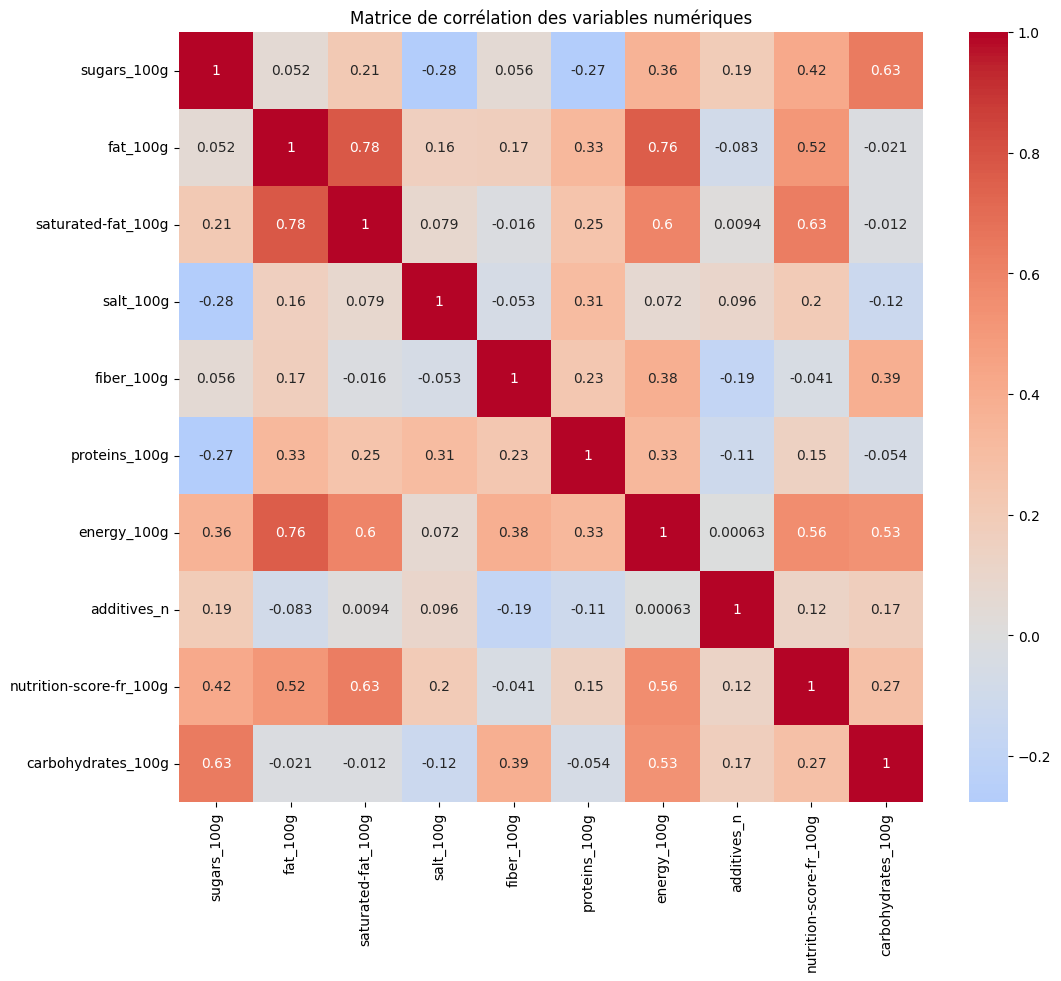

In [ ]:

correlation_matrix = complete_data_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

Colonnes et leur corrélations 
- fat_100g est corrélé à energy_100g (0.76), saturated-fat_100g (0.78), nutrition-score-fr_100g (0.52)
- saturated-fat_100g idem + nutrition-score-fr_100g (0.63)
- energy_100g est corrélé à fat_100g (0.76), sugars_100g (0.36), nutrition-score-fr_100g (0.56), carbohydrates_100g (0.53)
- sugars_100g est corrélé à carbohydrates_100g (0.63), nutrition-score-fr_100g (0.42)
- carbohydrates_100g corrélé à sugars_100g et energy_100g
-----
- fiber_100g est peu corrélée (correlations < 0.4 partout)
- salt_100g	 faiblement ou inversement corrélée
- proteins_100g	très faiblement corrélée (aucune > 0.35)
- additives_n inutile ici (corrélations proches de 0)
------

- nutrition-score-fr_100g bonne synthèse de tout ça, utile à garder en support


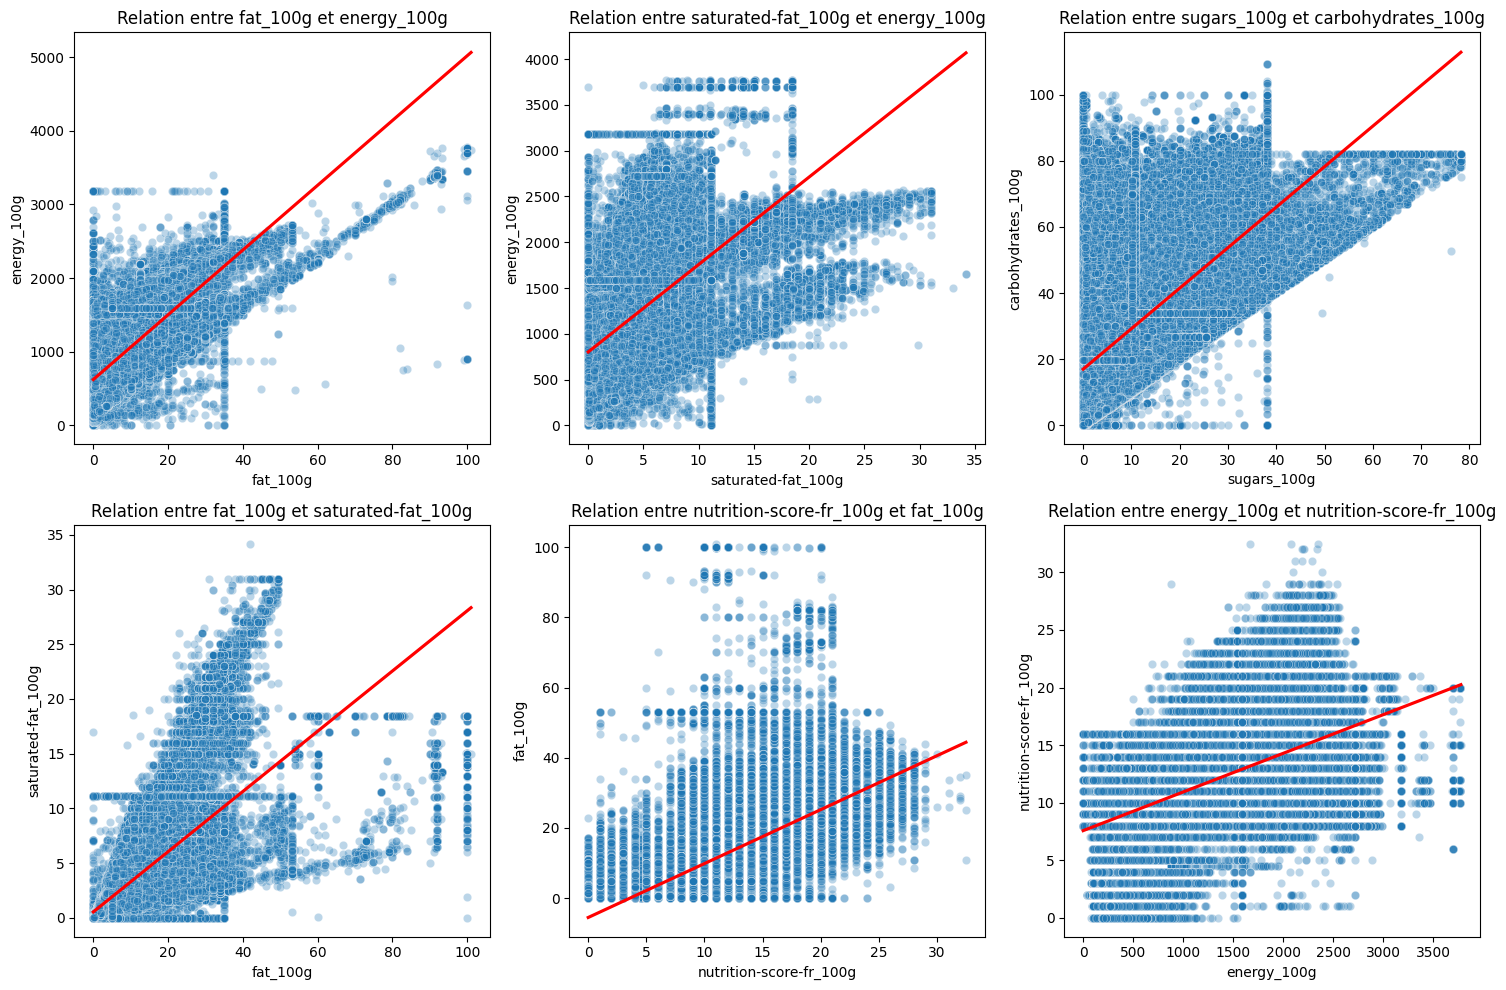

In [201]:

# Définir les paires à tracer
pairs_to_plot = [
    ('fat_100g', 'energy_100g'),
    ('saturated-fat_100g', 'energy_100g'),
    ('sugars_100g', 'carbohydrates_100g'),
    ('fat_100g', 'saturated-fat_100g'),
    ('nutrition-score-fr_100g', 'fat_100g'),
    ('energy_100g', 'nutrition-score-fr_100g'),
]

# Créer une figure avec 3 colonnes et 2 lignes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Ajuster figsize pour la taille des graphiques
axes = axes.flatten()  # Aplatir la grille pour un accès facile aux axes

# Tracer chaque paire sur un sous-graphe
for i, (x, y) in enumerate(pairs_to_plot):
    sns.scatterplot(x=x, y=y, data=complete_data_cleaned, alpha=0.3, ax=axes[i])
    sns.regplot(x=x, y=y, data=complete_data_cleaned, scatter=False, color="red", ax=axes[i])
    axes[i].set_title(f"Relation entre {x} et {y}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

# Supprimer les axes inutilisés si le nombre de graphiques est inférieur au nombre de sous-graphiques
for j in range(len(pairs_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

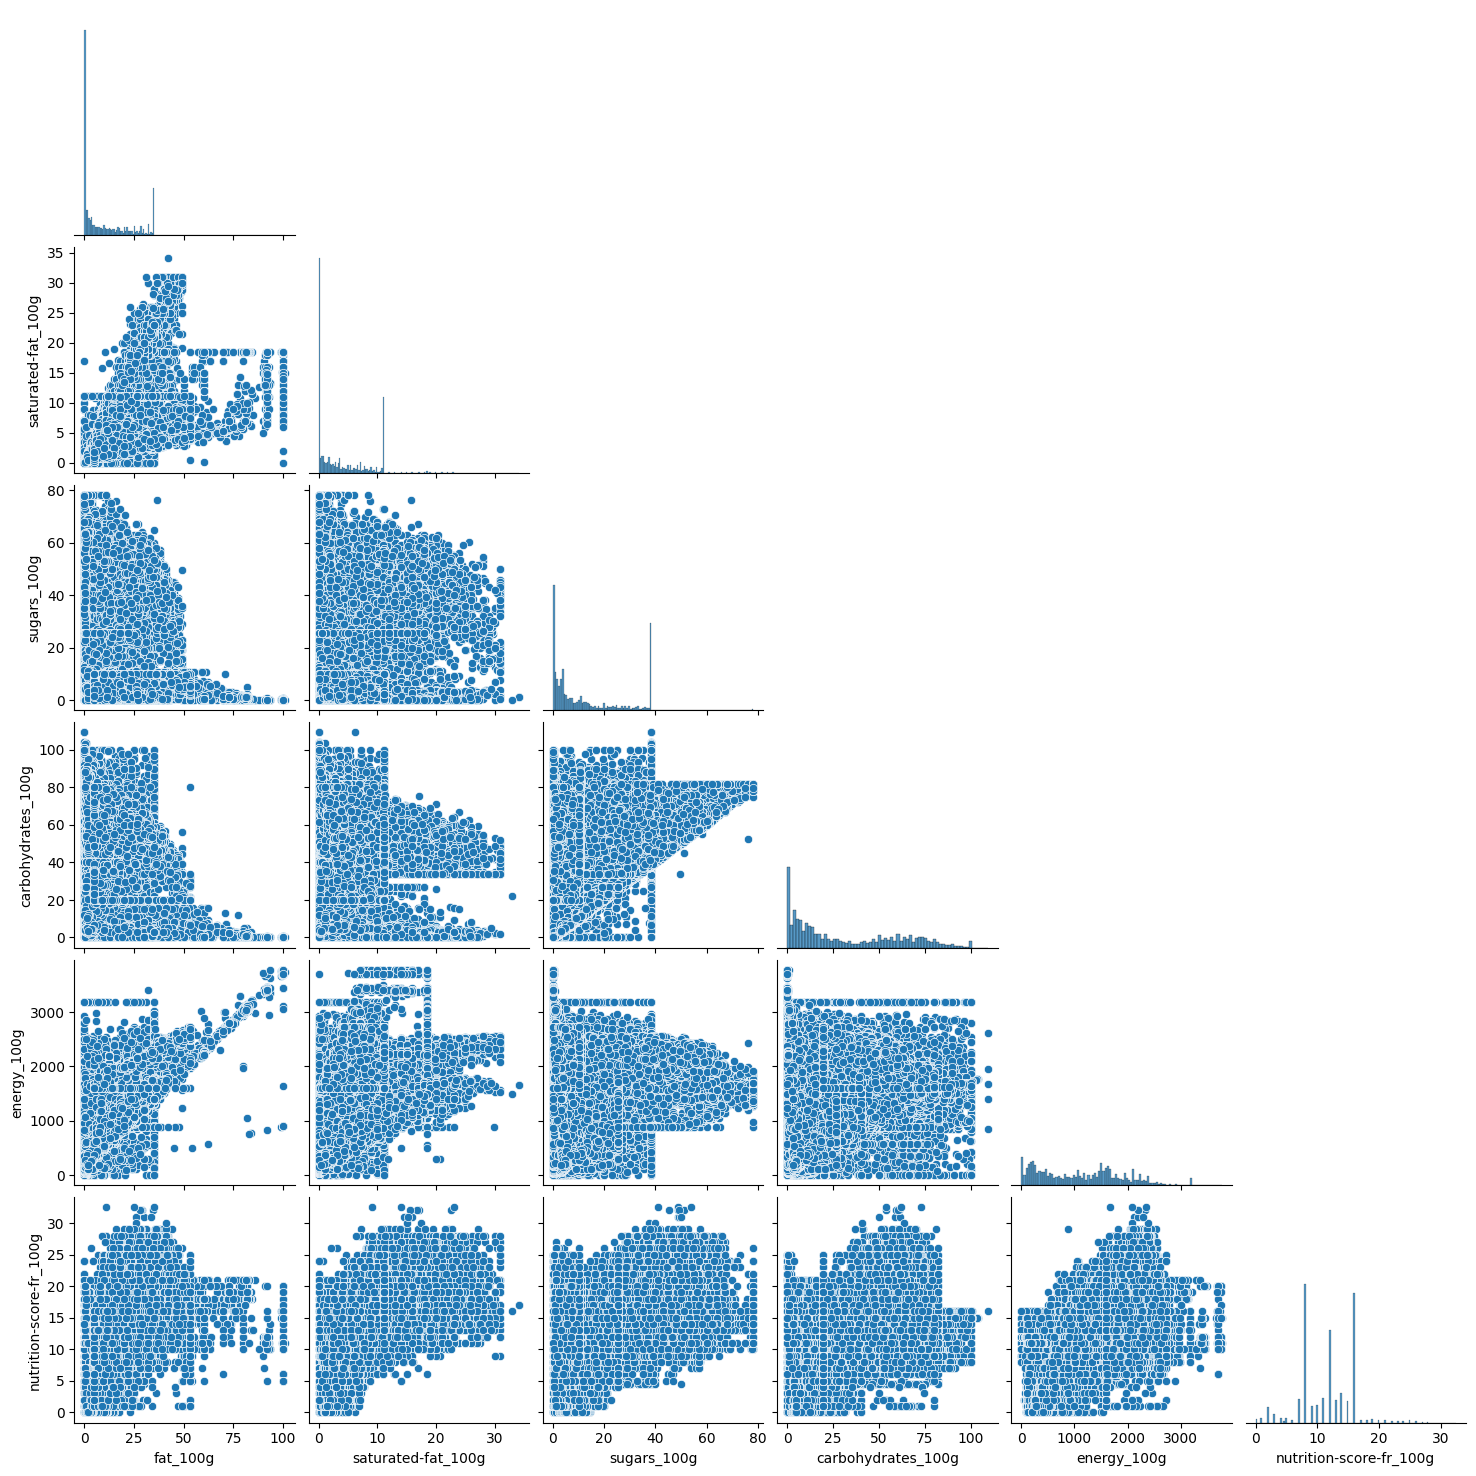

In [202]:
features_to_check = ['fat_100g', 'saturated-fat_100g', 'sugars_100g',
                     'carbohydrates_100g', 'energy_100g', 'nutrition-score-fr_100g']

sns.pairplot(complete_data_cleaned[features_to_check], corner=True)
plt.show()

#### b. traitement individuel


In [ ]:
complete_data_cleaned['fiber_100g'] = complete_data_cleaned['fiber_100g'].fillna(0)


for col in ['salt_100g', 'proteins_100g']:
    complete_data_cleaned[col] = complete_data_cleaned.groupby('pnns_groups_combined')[col].transform(
        lambda x: x.fillna(x.median())
    )


complete_data_cleaned['additives_n'] = complete_data_cleaned['additives_n'].fillna(0)

In [204]:
complete_data_cleaned.isna().sum()


code                            0
product_name                 3317
countries                      69
labels                     222226
labels_fr                  222145
ingredients_text            26702
sugars_100g                 16053
nutrition_grade_fr          39659
fat_100g                    18190
saturated-fat_100g          31874
salt_100g                       0
fiber_100g                      0
proteins_100g                   0
energy_100g                     0
categories                 196769
brands                       5830
additives_n                     0
nutrition-score-fr_100g     39659
carbohydrates_100g          18062
pnns_groups_combined            0
dtype: int64

#### c. Traitement corrélé (IntérativeImputer)

In [ ]:
# Sélectionner les colonnes numériques à imputer
columns_to_impute = ['sugars_100g', 'carbohydrates_100g', 'fat_100g', 'saturated-fat_100g', 'energy_100g']


data_to_impute = complete_data_cleaned[columns_to_impute]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_impute)

# Appliquer l'Iterative Imputer
iterative_imputer = IterativeImputer(max_iter=20, random_state=42)
data_imputed_scaled = iterative_imputer.fit_transform(data_scaled)


data_imputed = scaler.inverse_transform(data_imputed_scaled)


complete_data_cleaned[columns_to_impute] = data_imputed

print(complete_data_cleaned[columns_to_impute].isna().sum())

sugars_100g           0
carbohydrates_100g    0
fat_100g              0
saturated-fat_100g    0
energy_100g           0
dtype: int64


C:\Users\Amazi\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [206]:
complete_data_cleaned.isna().sum()

code                            0
product_name                 3317
countries                      69
labels                     222226
labels_fr                  222145
ingredients_text            26702
sugars_100g                     0
nutrition_grade_fr          39659
fat_100g                        0
saturated-fat_100g              0
salt_100g                       0
fiber_100g                      0
proteins_100g                   0
energy_100g                     0
categories                 196769
brands                       5830
additives_n                     0
nutrition-score-fr_100g     39659
carbohydrates_100g              0
pnns_groups_combined            0
dtype: int64

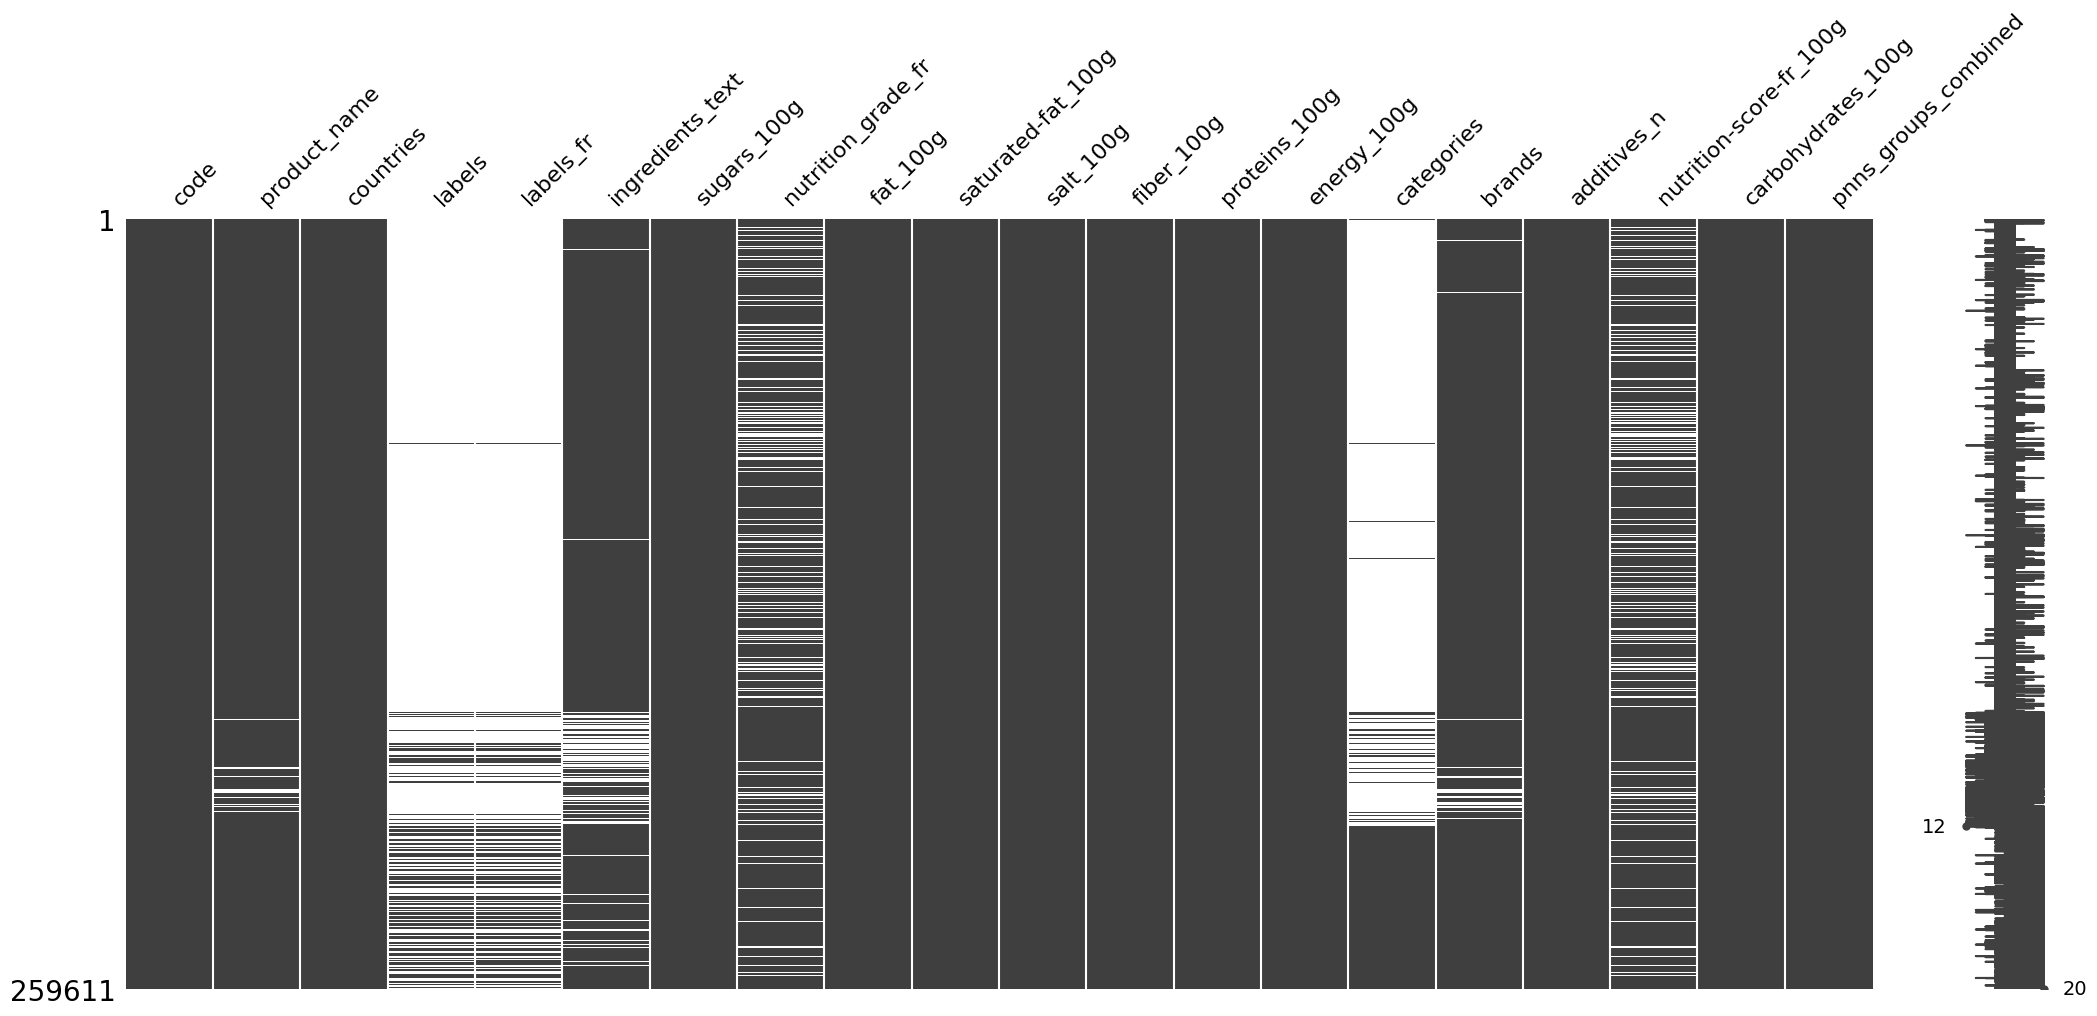

In [207]:
msno.matrix(complete_data_cleaned)
plt.show()

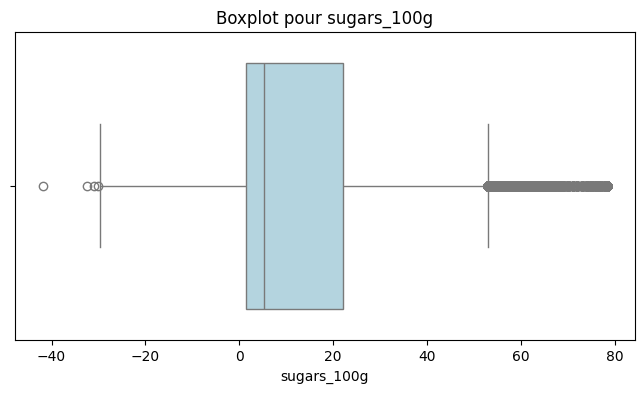

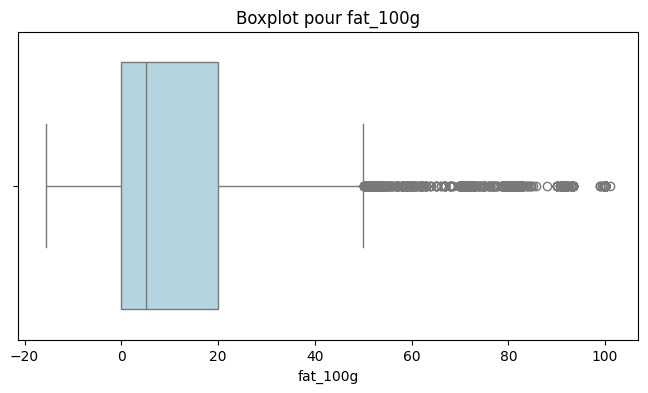

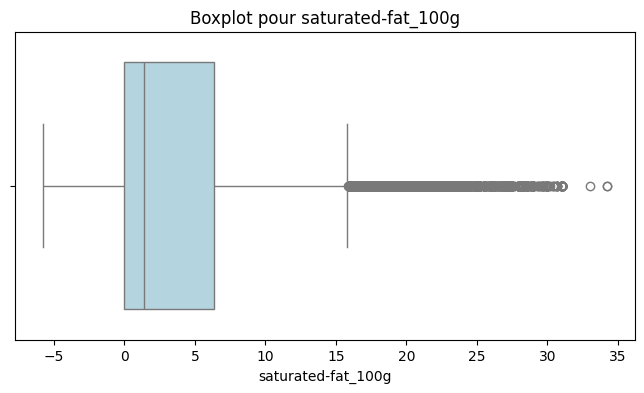

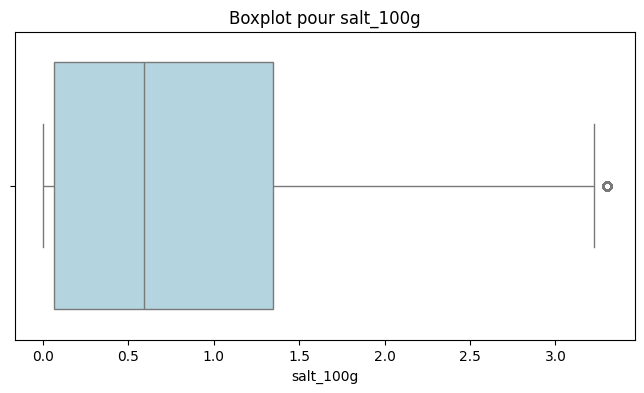

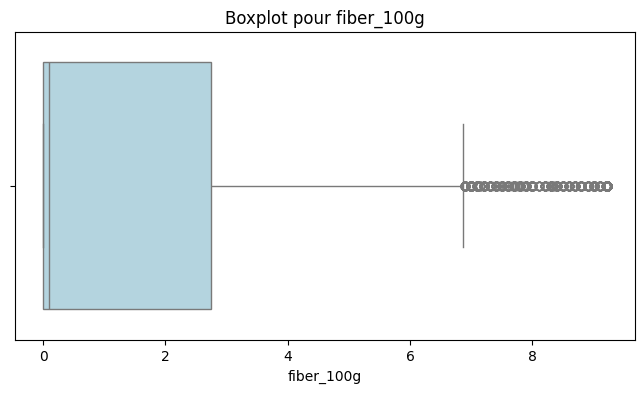

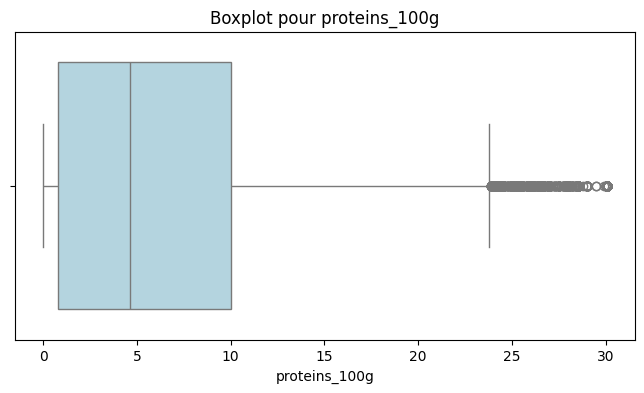

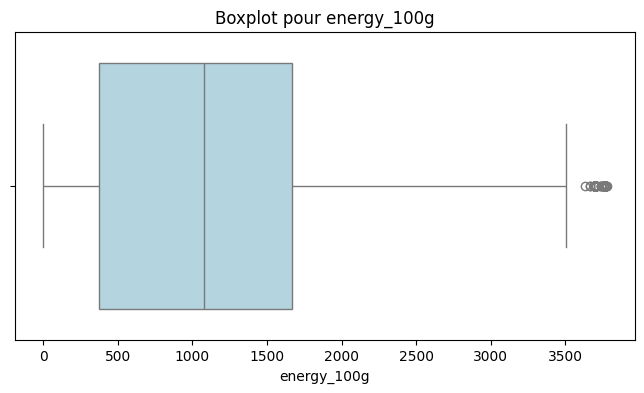

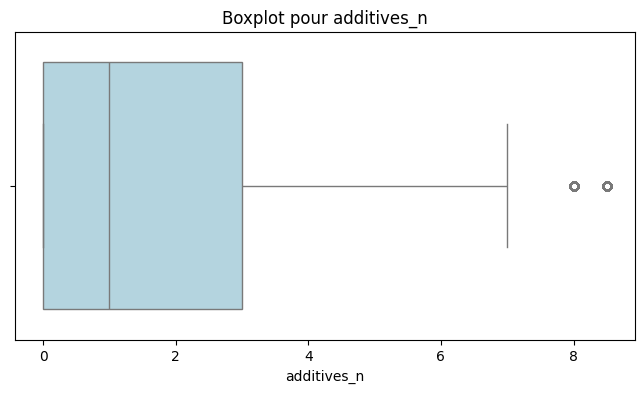

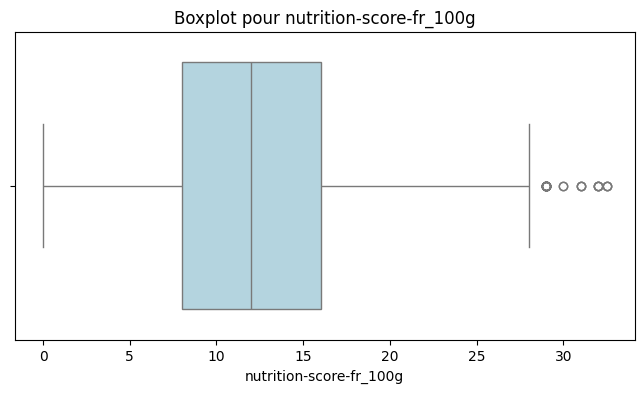

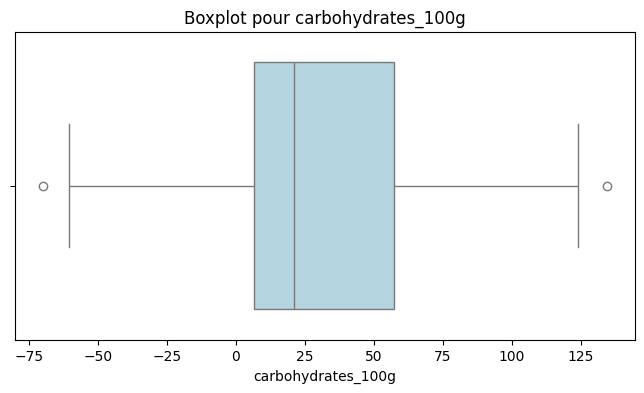

In [208]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=complete_data_cleaned[column], color='lightblue')
    plt.title(f"Boxplot pour {column}")
    plt.show()

In [209]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['autres', 'fruits et légumes', 'snacks sucrés',
       'céréales et pommes de terre', 'plats composés',
       'poissons viandes et œufs', 'boissons', 'graisses et sauces',
       'lait et produits laitiers', 'snacks salés'], dtype=object)

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\3912607948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


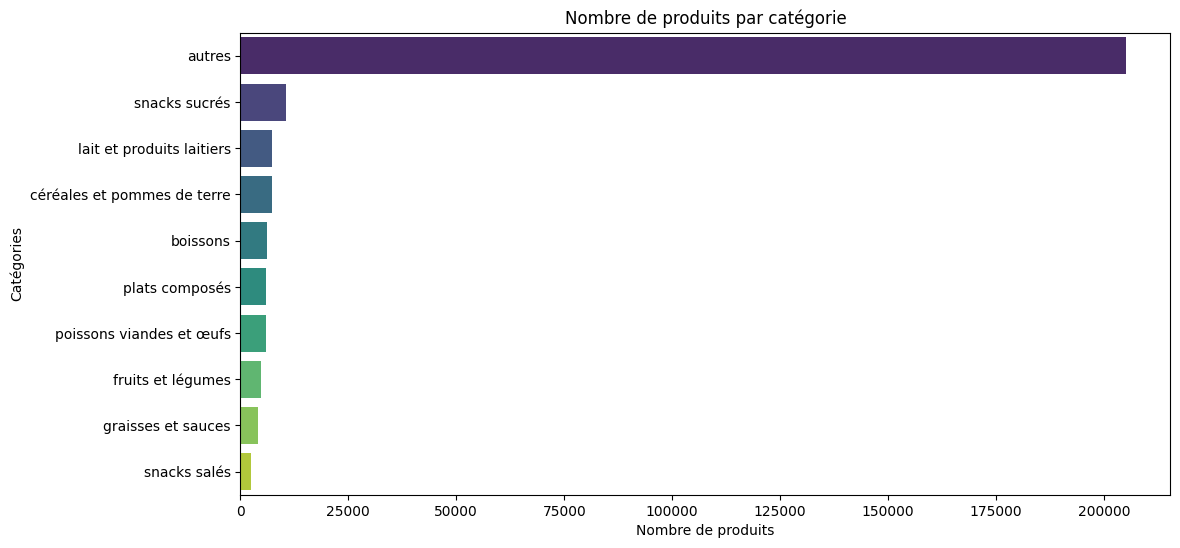

In [210]:
category_counts = complete_data_cleaned['pnns_groups_combined'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Nombre de produits par catégorie")
plt.xlabel("Nombre de produits")
plt.ylabel("Catégories")
plt.show()

                                                    /\
                                                   /  \
                                                  / |  \
                                                 /  |   \
                                                /   o    \
                                               /__________\
                                               
 
 A ce stade je doit faire un choix concerver les Valeurs tel quel et travailler avec des données manquant de nettoyage plus poussé ou supprimer la catégorie autres et travailler avec des données nettoyées. L'échantillon de données sera plus  petit mais plus représentatif et plus pertinent.

 Le manque de temp m'meèche de pousser le nettoyage plus loin.

In [211]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['autres', 'fruits et légumes', 'snacks sucrés',
       'céréales et pommes de terre', 'plats composés',
       'poissons viandes et œufs', 'boissons', 'graisses et sauces',
       'lait et produits laitiers', 'snacks salés'], dtype=object)

In [212]:

# Dictionnaire de mots-clés pour réassigner les produits
keywords_to_categories = {
    'chocolat|cacao|sucre': 'snacks sucrés',
    'lait|fromage|yaourt': 'lait et produits laitiers',
    'pomme|banane|fruit': 'fruits et légumes',
    'poulet|viande|poisson|oeuf': 'poissons viandes et œufs',
    'chips|snack|salé': 'snacks salés',
    'pain|céréale|riz|pâtes': 'céréales et pommes de terre',
    'boisson|jus|eau|soda': 'boissons',
    'huile|sauce|vinaigrette': 'graisses et sauces',
    'gâteau|biscuit|pâtisserie': 'biscuits and cakes',
}

# Fonction pour réassigner les catégories
def reassign_category(row):
    if row['pnns_groups_combined'] == 'autres':  # Vérifier si la catégorie est "autres"
        for keywords, category in keywords_to_categories.items():
            # Vérifier les mots-clés dans 'ingredients_text' ou 'product_name'
            if pd.notna(row['ingredients_text']) and re.search(keywords, row['ingredients_text'], re.IGNORECASE):
                return category
            if pd.notna(row['product_name']) and re.search(keywords, row['product_name'], re.IGNORECASE):
                return category
    return row['pnns_groups_combined']  # Garder la catégorie existante si aucune correspondance

# Appliquer la fonction pour réassigner les catégories
complete_data_cleaned['pnns_groups_combined'] = complete_data_cleaned.apply(reassign_category, axis=1)

# Vérifier les résultats
print(complete_data_cleaned['pnns_groups_combined'].value_counts())

pnns_groups_combined
autres                         127809
snacks sucrés                   32125
céréales et pommes de terre     22771
graisses et sauces              16297
fruits et légumes               14920
boissons                        13900
lait et produits laitiers        9856
snacks salés                     8687
poissons viandes et œufs         6861
plats composés                   5958
biscuits and cakes                427
Name: count, dtype: int64


In [213]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['snacks salés', 'boissons', 'autres', 'snacks sucrés',
       'graisses et sauces', 'céréales et pommes de terre',
       'fruits et légumes', 'biscuits and cakes',
       'poissons viandes et œufs', 'lait et produits laitiers',
       'plats composés'], dtype=object)

C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\3912607948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


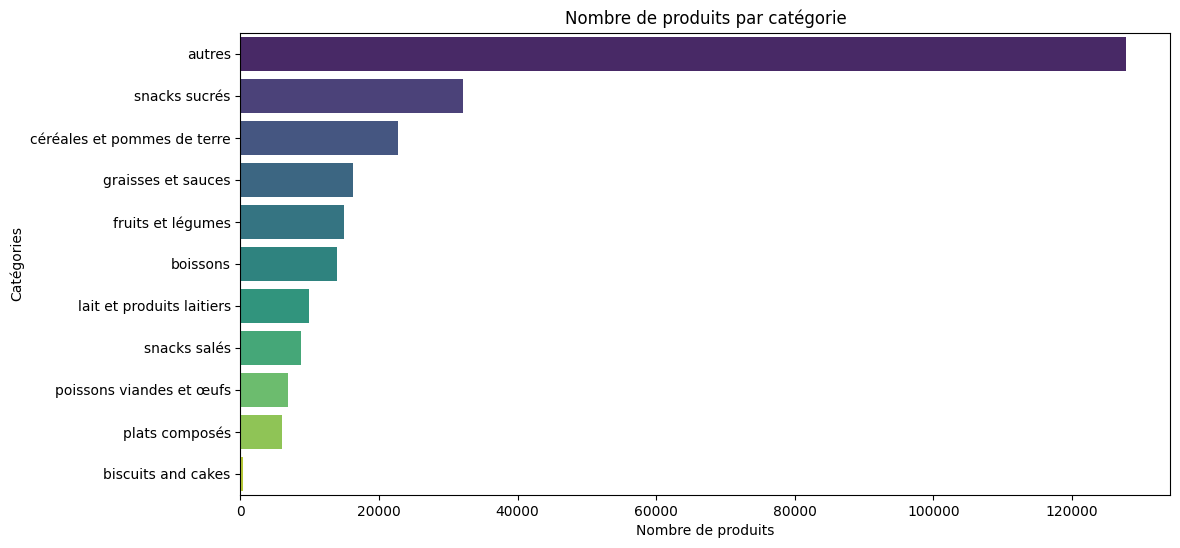

In [214]:
category_counts = complete_data_cleaned['pnns_groups_combined'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Nombre de produits par catégorie")
plt.xlabel("Nombre de produits")
plt.ylabel("Catégories")
plt.show()

In [215]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['snacks salés', 'boissons', 'autres', 'snacks sucrés',
       'graisses et sauces', 'céréales et pommes de terre',
       'fruits et légumes', 'biscuits and cakes',
       'poissons viandes et œufs', 'lait et produits laitiers',
       'plats composés'], dtype=object)

In [216]:
# Supprimer les lignes où la catégorie est 'autres'
complete_data_cleaned = complete_data_cleaned[complete_data_cleaned['pnns_groups_combined'] != 'autres']

# Vérifier que les lignes ont bien été supprimées
print(complete_data_cleaned['pnns_groups_combined'].value_counts())

pnns_groups_combined
snacks sucrés                  32125
céréales et pommes de terre    22771
graisses et sauces             16297
fruits et légumes              14920
boissons                       13900
lait et produits laitiers       9856
snacks salés                    8687
poissons viandes et œufs        6861
plats composés                  5958
biscuits and cakes               427
Name: count, dtype: int64


C:\Users\Amazi\AppData\Local\Temp\ipykernel_69804\3912607948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


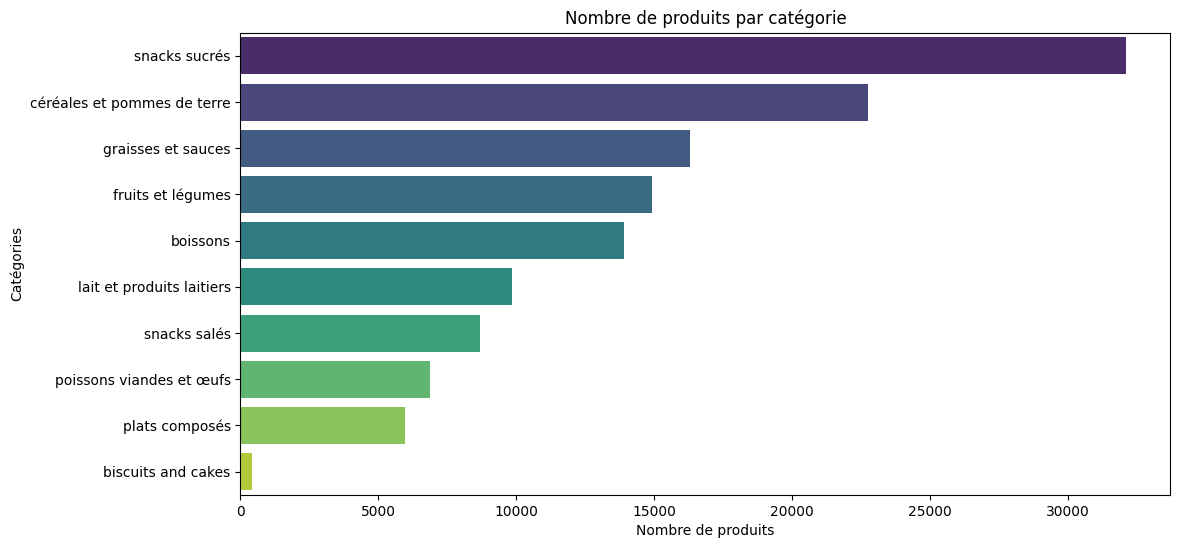

In [217]:
category_counts = complete_data_cleaned['pnns_groups_combined'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Nombre de produits par catégorie")
plt.xlabel("Nombre de produits")
plt.ylabel("Catégories")
plt.show()

- Gestion de la colonne nutrition_score-fr_100g 
- (avec reggression linéaire via les colonnes avec laquelle elle est corrélé)


In [218]:

# Définir les colonnes explicatives et la cible
features = ['fat_100g', 'saturated-fat_100g', 'energy_100g', 'sugars_100g']

# Séparer les données en deux ensembles : avec et sans valeurs manquantes dans 'nutrition_score-fr_100g'
X_train = complete_data_cleaned[complete_data_cleaned['nutrition-score-fr_100g'].notna()][features]
y_train = complete_data_cleaned[complete_data_cleaned['nutrition-score-fr_100g'].notna()]['nutrition-score-fr_100g']

X_missing = complete_data_cleaned[complete_data_cleaned['nutrition-score-fr_100g'].isna()][features]

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs manquantes
predicted_values = model.predict(X_missing)

# Remplir les valeurs manquantes dans 'nutrition_score-fr_100g'
complete_data_cleaned.loc[complete_data_cleaned['nutrition-score-fr_100g'].isna(), 'nutrition-score-fr_100g'] = predicted_values

# Vérifier que toutes les valeurs manquantes ont été remplies
print(complete_data_cleaned['nutrition-score-fr_100g'].isna().sum())

0


### Valeur Non mumérique

In [219]:
complete_data_cleaned[non_numeric_columns].isna().sum()

code                        0
product_name             1599
countries                  43
labels                  98422
labels_fr               98343
ingredients_text        11924
nutrition_grade_fr      13887
categories              72618
brands                   3089
pnns_groups_combined        0
dtype: int64

In [220]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['snacks salés', 'boissons', 'snacks sucrés', 'graisses et sauces',
       'céréales et pommes de terre', 'fruits et légumes',
       'biscuits and cakes', 'poissons viandes et œufs',
       'lait et produits laitiers', 'plats composés'], dtype=object)

In [221]:
complete_data_cleaned['product_name'] = complete_data_cleaned['product_name'].fillna('unknown product')

- on renomme les valeur manquante des nom des produit par une valeur par défaut (en vue d'être potentiellement supprimer)

In [222]:
complete_data_cleaned['countries'] = complete_data_cleaned['countries'].fillna('unknown')

- Je supprime les colonne 'labels', 'labels_fr', 'categories' car trop de valeurs manquantes

In [223]:
complete_data_cleaned = complete_data_cleaned.drop(columns=['labels', 'labels_fr', 'categories'], errors='ignore')

In [224]:
complete_data_cleaned['brands'] = complete_data_cleaned['brands'].fillna('unknown brand')

In [225]:
non_numeric_columns = complete_data_cleaned.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

complete_data_cleaned[non_numeric_columns].isna().sum()

code                        0
product_name                0
countries                   0
ingredients_text        11924
nutrition_grade_fr      13887
brands                      0
pnns_groups_combined        0
dtype: int64

In [ ]:
def calculate_nutrition_grade(row):
    # Points négatifs
    energy_points = min(row['energy_100g'] / 335, 10)  # 335 kJ = 80 kcal
    sugar_points = min(row['sugars_100g'] / 4.5, 10)
    saturated_fat_points = min(row['saturated-fat_100g'] / 1, 10)
    salt_points = min(row['salt_100g'] / 0.09, 10)

    negative_points = energy_points + sugar_points + saturated_fat_points + salt_points

    # Points positifs
    fiber_points = min(row['fiber_100g'] / 0.9, 5)
    protein_points = min(row['proteins_100g'] / 1.6, 5)

    # Fruits, vegetables, nuts percentage (if available)
    # Assuming a column 'fruits_vegetables_nuts_100g' exists
    fruits_vegetables_points = 0
    if 'fruits_vegetables_nuts_100g' in row:
        if row['fruits_vegetables_nuts_100g'] > 80:
            fruits_vegetables_points = 5
        elif row['fruits_vegetables_nuts_100g'] > 60:
            fruits_vegetables_points = 2
        elif row['fruits_vegetables_nuts_100g'] > 40:
            fruits_vegetables_points = 1

    positive_points = fiber_points + protein_points + fruits_vegetables_points

    # Final score
    score = negative_points - positive_points

    # Convert score to grade
    if score <= -1:
        return 'A'
    elif score <= 2:
        return 'B'
    elif score <= 10:
        return 'C'
    elif score <= 18:
        return 'D'
    else:
        return 'E'


complete_data_cleaned['nutrition_grade_fr'] = complete_data_cleaned.apply(
    lambda row: calculate_nutrition_grade(row) if pd.isna(row['nutrition_grade_fr']) else row['nutrition_grade_fr'],
    axis=1
)

In [ ]:
complete_data_cleaned['nutrition_grade_fr'] = complete_data_cleaned['nutrition_grade_fr'].str.upper()

In [228]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['snacks salés', 'boissons', 'snacks sucrés', 'graisses et sauces',
       'céréales et pommes de terre', 'fruits et légumes',
       'biscuits and cakes', 'poissons viandes et œufs',
       'lait et produits laitiers', 'plats composés'], dtype=object)

- On remplace le nutriscore grade manquante avec la formule officielle

In [ ]:
ingredients_by_category = {
    'chocolates': 'cacao, sucre, lait',
    'fruit juices': 'eau, jus de fruits, sucre',
    'biscuits and cakes': 'farine, sucre, beurre',
}

complete_data_cleaned['ingredients_text'] = complete_data_cleaned.apply(
    lambda row: ingredients_by_category.get(row['pnns_groups_combined'], 'unknown') 
    if pd.isna(row['ingredients_text']) else row['ingredients_text'],
    axis=1
)

In [230]:
complete_data_cleaned[non_numeric_columns].isna().sum()

code                    0
product_name            0
countries               0
ingredients_text        0
nutrition_grade_fr      0
brands                  0
pnns_groups_combined    0
dtype: int64

- On va Garder uniquement les produit vendu en France. 

- Les produit non vendu en france n'on pas d'utilités pour les consommateur francais.

In [231]:
# Liste des valeurs à remplacer
valeurs_a_remplacer = [
    "france",
    "en:france",
    "França",
    "Frankreich",
    "Francia",
    "France",
    "Franciaország",
    "Frankrijk",
    "en:french-polynesia",
    "France,United Kingdom",
    "France, Suisse",
    "France,États-Unis",
    "France,Belgique,Royaume-Uni,Pays-Bas",
    "France,Royaume-Uni",
    "France,Saint Pierre and Miquelon",
    "Belgique,France,États-Unis",
    "France,Belgium",
    "Dinamarca,França,Itália,Países Baixos,Polónia,Portugal,Espanha",
    "Frankreich,Deutschland",
    "France,Allemagne,Espagne",
    "France,Portugal",
    "France,Portugal,Espagne",
    "France,Germany",
    "Francia,España",
    "Pays-Bas,France",
    "Belgique,France",
    "France, en:denmark, en:switzerland, en:belgium",
    "France, en:belgium, en:switzerland, en:reunion",
    "Belgique,France,Polynésie française,Martinique,Suisse",
    "Austria,France,Germany,Italy,Netherlands,Switzerland",
    "Saint-Pierre-et-Miquelon",
    "Dánia,Franciaország,Portugália,Spanyolország,Nagy-Britannia,Magyarország, en:switzerland",
    "Dánia,Franciaország,Németország,Portugália,Spanyolország,Nagy-Britannia,Magyarország, en:switzerland, en:belgium",
    "Frankreich,Deutschland,Mauritius,Espagne,Royaume-Uni",
    "France,Suisse",
    "France, en:reunion",
    "France,Switzerland",
    "La Réunion",
    "Frankrijk",
    "Belgique,France,Suisse",
    "España, en:france",
    "France, en:switzerland",
    "France, en:belgium",
    "France, en:belgium, Suisse",
    "Guyane",
    "Belgique, en:france",
    "Francia, España",
    "France, en:switzerland, en:belgium",
    "Guyane, France",
    "France,Spain",
    "France,Guadeloupe",
    "La Réunion, France",
    "France,La Réunion",
    "France,Belgique,Pays-Bas,Royaume-Uni",
    "Belgium,France",
    "France,Belgique",
    "France, en:denmark",
    "France,Espagne, en:french-polynesia",
    "France,Russie, Suisse",
    "Belgium, en:france",
    "France,Serbie",
    "France,belgique",
    "Belgique,France,Luxembourg",
    "Belgique,France,Maroc,Suisse",
    "Belgium,Denmark,France,Poland",
    "France,Guadeloupe,Suisse",
    "Danemark,France,Suisse,Royaume-Uni",
    "Suisse, en:france",
    "France,Andorre",
    "France, en:belgium",
    "Belgium,France,Netherlands",
    "Deutschland, en:france",
    "Belgique,France, Suisse",
    "France, US",
    "Brésil,France",
    "Algérie,France",
    "Francia,Portugal,España",
    "França,Portugal,Espanha",
    "Guadeloupe",
    "France,Pays-Bas",
    "UK,France",
    "United States, en:france",
    "France,Allemagne",
    "France,Espagne",
    "France, en:belgium, en:switzerland, en:morocco",
    'en:HK, en:france'
]

complete_data_cleaned["countries"] = complete_data_cleaned["countries"].replace("Belgique", "Belgium")
complete_data_cleaned["countries"] = complete_data_cleaned["countries"].replace("România", "Romania")


# Remplacer les valeurs dans la colonne 'countries'

complete_data_cleaned["countries"] = complete_data_cleaned["countries"].replace(valeurs_a_remplacer, "en:FR")

complete_data_cleaned["countries"].unique()

array(['us', 'en:gb', 'france, us', 'canada', 'en:FR', 'deutschland',
       'united states', 'uk,france', 'royaume-uni,france',
       'france,united kingdom', 'en:us', 'united kingdom', 'australia',
       'en:fr, suisse', 'en:fr, us', 'united states, en:france',
       'france,united states', 'france,royaume-uni', 'us,switzerland',
       'suisse', 'belgium,united states,switzerland', 'france,uk',
       'united kingdom,france', 'en:au, us', 'france, suisse',
       'france,switzerland', 'en:ch', 'en:ca, us', 'usa', 'switzerland',
       'unknown', 'uk,czech', 'québec, canada', 'états-unis',
       'canada, us', 'australia, us', 'italy', 'en:gr, us', 'en:gb, us',
       'hong kong', 'italia', 'belgique', 'suisse,belgique, en:france',
       'en:sg, us', 'france,états-unis', 'united kingdom, us',
       'philippines', 'belgium, us',
       'chili,france,espagne,suisse,royaume-uni', 'etats-unis', 'irland',
       'sénégal', 'españa', 'togo', 'allemagne,suisse',
       'allemagne,belgi

In [232]:
# Liste des variantes de "France"
variantes_france = [
    "france", "en:france", "frança", "francia", "franciaország", "frankreich", "frankrijk", "en:french-polynesia", "Guyane", "La Réunion"
]

# Fonction pour vérifier si une chaîne contient une variante de "France"
def contient_france(countries):
    if pd.isna(countries):  # Gérer les valeurs manquantes
        return False
    for variante in variantes_france:
        if variante in countries.lower():  # Vérification insensible à la casse
            return True
    return False

# Filtrer les lignes où "France" est présente sans créer de colonne
complete_data_cleaned = complete_data_cleaned[complete_data_cleaned["countries"].apply(contient_france)]


# 5. Exportation Dataset Final

In [233]:
complete_data_cleaned['pnns_groups_combined'].unique()

array(['snacks sucrés', 'graisses et sauces', 'poissons viandes et œufs',
       'snacks salés', 'céréales et pommes de terre', 'boissons',
       'lait et produits laitiers', 'biscuits and cakes',
       'fruits et légumes', 'plats composés'], dtype=object)

In [234]:
complete_data_cleaned.head()

,code,product_name,countries,ingredients_text,sugars_100g,nutrition_grade_fr,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,energy_100g,brands,additives_n,nutrition-score-fr_100g,carbohydrates_100g,pnns_groups_combined
100,0000000036252,lion peanut x2,"france, us","milk chocolate coating (evaporated cane juice,...",38.1,E,20.000000,11.1,0.09652,2.5,2.50,1883.0,sunridge,1.0,16.0,70.000000,snacks sucrés
373,00011747,triple belgian chocolaté chunk cookies,"uk,france",unknown,34.4,E,27.280193,11.1,0.85000,2.9,5.60,2184.0,marks & spencer,0.0,16.0,57.464646,snacks sucrés
414,00025751,honey roast ham,"royaume-uni,france",porc d’origine britannique (élaboré avec 120 g...,2.9,C,2.000000,0.7,2.00000,0.1,18.38,564.0,"marks & spencer,m&s",1.0,8.0,4.300000,snacks sucrés
451,00048569,barbecue sauce,"france, us",unknown,32.7,D,7.500000,0.8,1.28000,1.8,1.10,665.0,"mark and spencer, trader joe's",0.0,11.0,67.500000,graisses et sauces
552,00080910,poulet tikka masala et riz pilaf,"uk,france",unknown,0.6,A,6.173091,1.6,0.63000,2.7,8.90,619.0,marks & spencer,0.0,12.0,13.857636,poissons viandes et œufs


In [235]:
complete_data_cleaned.isna().sum()  

code                       0
product_name               0
countries                  0
ingredients_text           0
sugars_100g                0
nutrition_grade_fr         0
fat_100g                   0
saturated-fat_100g         0
salt_100g                  0
fiber_100g                 0
proteins_100g              0
energy_100g                0
brands                     0
additives_n                0
nutrition-score-fr_100g    0
carbohydrates_100g         0
pnns_groups_combined       0
dtype: int64

In [236]:
complete_data_cleaned.shape


(2658, 17)

In [237]:
complete_data_cleaned.to_csv('dataset_cleaned_fr.csv', index=False, encoding='utf-8')